<div style="text-align:center"><h1>PBH in Critical Higgs Inflation</h1></div>
<h2 style="text-align:center">-Test $\xi$</h2>
<div style="text-align:right"><b>Tae Geun Kim</b></div>
*****

<h2>- Table of Contents</h2>

> <a href="#main"><font size=4>1. Main Code</font></a>  
> <a href="#running"><font size=4>2. Running Coupling Constant</font></a>  
> <a href="#ssr"><font size=4>3. Slow-Roll Parameter</font></a>  

---------------------------

<h2 class="main"><a name="#main">1. Main Code (Cython Code)</a></h2>

In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [1]:
%load_ext Cython

In [2]:
import numpy as np
import pylab as plt
import seaborn

In [3]:
%%cython
import numpy as np
cimport numpy as np
from libc.math cimport sqrt, exp, log, log10, pi
#-------------------------------------------------------
#--------------Main Class-------------------------------
#-------------------------------------------------------
cdef class RGE:
    cdef public double t, mt, xi, Mp, MpR, MW, MZ, MH, alphasMZ, lH, yt, g1, g2, g3, phi, LG
    cdef public double h, sh, Beta_lH1, Beta_g11, Beta_g21, Beta_g31, Beta_yt1, gamma1
    cdef public double Beta_lH2, Beta_g12, Beta_g22, Beta_g32, Beta_yt2, gamma2
    cdef public object Betas1, Betas2, Beta, Beta_real
    
    def __init__(self, mt_init, xi_init, tstart):
        self.t = tstart
        self.mt = mt_init
        self.xi = xi_init
        self.Mp = 1.221*10**(19)
        self.MpR = 2.4*10**(18) # Reduced Planck Mass
        self.MW = 80.385
        self.MZ = 91.1876
        self.MH = 125.09
        self.alphasMZ = 0.1182
        self.lH = 0.12604 + 0.00206 * (self.MH - 125.15) - 0.00004 * (self.mt - 173.34)
        self.yt = (
            0.93690 + 0.00556 * (self.mt - 173.34) - 0.00003*(self.MH - 125.15) 
            - 0.00042*(self.alphasMZ - 0.1184) / 0.0007
        )
        self.g3 = 1.1666 + 0.00314 * (self.alphasMZ - 0.1184)/0.007 - 0.00046 * (self.mt - 173.34)
        self.g2 = 0.64779 + 0.00004 * (self.mt - 173.34) + 0.00011 * (self.MW - 80.384) / 0.014
        self.g1 = 0.35830 + 0.00011 * (self.mt - 173.34) - 0.00020 * (self.MW - 80.384) / 0.014
        self.LG = 0
        
    def BETA(self): # To Initialize
        # 1-Loop Beta Functions
        self.h = sqrt(2)/self.yt * self.mt * exp(self.t)
        self.phi = self.h
        self.sh = (
            (1 + self.xi * self.h ** 2 / self.MpR**2)/(1+(1+6*self.xi)*self.xi*self.h**2/self.MpR**2)
        )
        self.Beta_lH1 = (
            6*(1+3*self.sh**2)*self.lH**2 + 12*self.lH*self.yt**2 - 6*self.yt**4 - 3*self.lH*(3*self.g2**2 + self.g1**2)
            + 3/8*(2*self.g2**4 + (self.g1**2 + self.g2**2)**2)
        )
        self.Beta_g11 = (81 + self.sh)/12 * self.g1**3
        self.Beta_g21 = - (39 - self.sh) / 12 * self.g2 **3
        self.Beta_g31 = -7*self.g3**3
        self.Beta_yt1 = (
            self.yt * ((23/6 + 2/3*self.sh)*self.yt**2 - (8*self.g3**2 + 9/4*self.g2**2 + 17/12 * self.g1**2))
        )
        self.gamma1 = -(9/4*self.g2**2 + 3/4*self.g1**2 - 3*self.yt**2)
        self.Betas1 = np.array([self.Beta_lH1, self.Beta_g11, self.Beta_g21, 
                       self.Beta_g31, self.Beta_yt1, self.gamma1])
        # 2-Loop Beta Functions
        self.Beta_lH2 = (
            1/48*((912+3*self.sh)*self.g2**6 - (290-self.sh)*self.g1**2*self.g2**4 
                  - (560-self.sh) * self.g1**4*self.g2**2 - (380-self.sh)*self.g1**6)
            + (38-8*self.sh)*self.yt**6 - self.yt**4 * (8/3*self.g1**2 + 32*self.g3**2 + (12-117*self.sh+108*self.sh**2)*self.lH)
            + self.lH * (-1/8*(181 + 54*self.sh - self.sh**2)*self.g2**4
                        + 1/4*(3-18*self.sh + 54*self.sh**2)*self.g1**2*self.g2**2 + 1/24*(90+377*self.sh+162*self.sh**2)*self.g1**4
                        + (27+54*self.sh+27*self.sh**2)*self.g2**2*self.lH + (9+18*self.sh+9*self.sh**2)*self.g1**2*self.lH
                        - (48+288*self.sh - 324*self.sh**2 + 624*self.sh**3 - 324*self.sh**4)*self.lH**2)
            + self.yt**2*(-9/4*self.g2**4 + 21/2*self.g1**2*self.g2**2 - 19/4*self.g1**4
                         + self.lH*(45/2*self.g2**2 + 85/6*self.g1**2 + 80*self.g3**2 - (36+108*self.sh**2)*self.lH))
        )
        self.Beta_g12 = (
            199/18 * self.g1**5 + 9/2 * self.g1**3*self.g2**2 + 44/3*self.g1**3*self.g3**2
            - 17/6 * self.sh * self.g1**3 * self.yt**2
        )
        self.Beta_g22 = (
            3/2 * self.g1**2 * self.g2**3 + 35/6*self.g2**5 + 12*self.g2**3*self.g3**2
            - 3/2 * self.sh * self.g2**3 * self.yt**2
        )
        self.Beta_g32 = (
            11/6 * self.g1**2 * self.g3**3 + 9/2*self.g2**2*self.g3**3 - 26*self.g3**5
            - 2 * self.sh * self.g3**3 * self.yt**2
        )
        self.Beta_yt2 = (
            self.yt * (-23/4 * self.g2**4 - 3/4 * self.g1**2 * self.g2**2 + 1187/216*self.g1**4
                      + 9*self.g2**2*self.g3**2 + 19/9*self.g1**2*self.g3**2 - 108*self.g3**4
                      + (225/16*self.g2**2 + 131/16*self.g1**2 + 36*self.g3**2)*self.sh*self.yt**2
                      + 6*(-2*self.sh**2*self.yt**4 - 2*self.sh**3*self.yt**2*self.lH + self.sh**2*self.lH**2)
                      )
        )
        self.gamma2 = (
            -(271/32 * self.g2**4 - 9/16 * self.g1**2 * self.g2**2 - 431/96 * self.sh * self.g1**4
             - 5/2 * (9/4 * self.g2**2 + 17/12 * self.g1**2 + 8*self.g3**2) * self.yt**2 + 27/4 * self.sh*self.yt**4
             - 6 * self.sh**3 * self.lH**2)
        )
        self.Betas2 = np.array([self.Beta_lH2, self.Beta_g12, self.Beta_g22, 
                       self.Beta_g32, self.Beta_yt2, self.gamma2])
        # Total Beta Functions
        self.Beta = np.empty(len(self.Betas1))
        for i, (beta1, beta2) in enumerate(zip(self.Betas1, self.Betas2)):
            self.Beta[i] = 1/(16*pi**2)*beta1 + 1/(16*pi**2)**2*beta2
        self.Beta_real = np.array([beta/(1+self.Beta[5]) for beta in self.Beta])
        
    def Running(self, double h):
        # Running Coupling Constant
        self.lH += h * self.Beta_real[0]
        self.g1 += h * self.Beta_real[1]
        self.g2 += h * self.Beta_real[2]
        self.g3 += h * self.Beta_real[3]
        self.yt += h * self.Beta_real[4]
        self.LG += h * self.Beta_real[5]
        self.t += h
#-------------------------------------------------------
#--------------Running----------------------------------
#-------------------------------------------------------
cpdef tuple RCC(double Mt, double xi, int Nend, double h): # M_t, xi, End point, precision
    # Real Running
    cdef int i, k
    A = RGE(Mt, xi, 0)
    k = int(1/h * Nend)
    cdef np.ndarray[dtype=double, ndim=1] lH, yt, t, g1, g2, g3, phi, G
    lH = np.empty(k)
    yt = np.empty(k)
    t = np.empty(k)
    g1 = np.empty(k)
    g2 = np.empty(k)
    g3 = np.empty(k)
    phi = np.empty(k)
    G = np.empty(k)
    for i in range(k):
        A.BETA() # initialize by calling BETA
        lH[i] = A.lH
        g1[i] = A.g1
        g2[i] = A.g2
        g3[i] = A.g3
        yt[i] = A.yt
        t[i] = A.t
        phi[i] = A.phi
        G[i] = exp(-A.LG)
        A.Running(h)
    return (lH, g1, g2, g3, yt, t, phi, G)

# More Faster
cpdef tuple RCC_intxi(double Mt, int xi, int Nend, double h): # M_t, xi, End point, precision
    # Real Running
    cdef object A = RGE(Mt, xi, 0)
    cdef int i, k = int(1/h * Nend)
    cdef np.ndarray[dtype=double, ndim=1] lH, yt, t, g1, g2, g3, phi, G
    lH = np.empty(k)
    yt = np.empty(k)
    t = np.empty(k)
    g1 = np.empty(k)
    g2 = np.empty(k)
    g3 = np.empty(k)
    phi = np.empty(k)
    G = np.empty(k)
    for i in range(k):
        A.BETA() # initialize by calling BETA
        lH[i] = A.lH
        g1[i] = A.g1
        g2[i] = A.g2
        g3[i] = A.g3
        yt[i] = A.yt
        t[i] = A.t
        phi[i] = A.phi
        G[i] = exp(-A.LG)
        A.Running(h)
    return (lH, g1, g2, g3, yt, t, phi, G)

#Parallelize
cpdef tuple RCC_parallel(tuple Tup): # M_t, xi, End point, precision
    cdef double Mt=Tup[0], h=Tup[3]
    cdef int xi=Tup[1], Nend=Tup[2]
    # Real Running
    cdef object A = RGE(Mt, xi, 0)
    cdef int i, k = int(1/h * Nend)
    cdef np.ndarray[dtype=double, ndim=1] lH, yt, t, g1, g2, g3, phi, G, BlH
    lH = np.empty(k)
    yt = np.empty(k)
    t = np.empty(k)
    g1 = np.empty(k)
    g2 = np.empty(k)
    g3 = np.empty(k)
    phi = np.empty(k)
    G = np.empty(k)
    BlH = np.empty(k)
    for i in range(k):
        A.BETA() # initialize by calling BETA
        lH[i] = A.lH
        g1[i] = A.g1
        g2[i] = A.g2
        g3[i] = A.g3
        yt[i] = A.yt
        t[i] = A.t
        phi[i] = A.phi
        G[i] = exp(-A.LG)
        BlH[i] = A.Beta[0]
        A.Running(h)
    return (lH, g1, g2, g3, yt, t, phi, G, BlH)
#-------------------------------------------------------
#--------------Reading----------------------------------
#-------------------------------------------------------
cpdef tuple Reader(double mt, int xi): # Now consider only int xi
    cdef object in_temp, line, obj, elem
    cdef list TP
    cdef np.ndarray[dtype=double, ndim=1] lH, yt, t, g1, g2, g3, phi, G
    in_temp = open(str(mt)+'_'+str(xi)+'_lamb.csv', 'r')
    TP = [line.split(',') for line in in_temp]
    for obj in TP:
        del(obj[len(obj)-1])
    lH = np.array([float(elem) for elem in TP[0]])
    g1 = np.array([float(elem) for elem in TP[1]])
    g2 = np.array([float(elem) for elem in TP[2]])
    g3 = np.array([float(elem) for elem in TP[3]])
    yt = np.array([float(elem) for elem in TP[4]])
    t = np.array([float(elem) for elem in TP[5]])
    phi = np.array([float(elem) for elem in TP[6]])
    G = np.array([float(elem) for elem in TP[7]])
    return (lH, g1, g2, g3, yt, t, phi, G)

# Parallelize
cpdef tuple Reader_parallel(tuple Tup): # Now consider only int xi
    cdef double mt=Tup[0]
    cdef int xi=Tup[1]
    cdef object in_temp, line, obj, elem
    cdef list TP
    cdef np.ndarray[dtype=double, ndim=1] lH, yt, t, g1, g2, g3, phi, G, BlH
    in_temp = open(str(mt)+'_'+str(xi)+'_lamb.csv', 'r')
    TP = [line.split(',') for line in in_temp]
    for obj in TP:
        del(obj[len(obj)-1])
    lH = np.array([float(elem) for elem in TP[0]])
    g1 = np.array([float(elem) for elem in TP[1]])
    g2 = np.array([float(elem) for elem in TP[2]])
    g3 = np.array([float(elem) for elem in TP[3]])
    yt = np.array([float(elem) for elem in TP[4]])
    t = np.array([float(elem) for elem in TP[5]])
    phi = np.array([float(elem) for elem in TP[6]])
    G = np.array([float(elem) for elem in TP[7]])
    BlH = np.array([float(elem) for elem in TP[8]])
    return (lH, g1, g2, g3, yt, t, phi, G, BlH)
#-------------------------------------------------------
#--------------Saving-----------------------------------
#-------------------------------------------------------
cpdef Saver(double mt, int xi, tuple List): # Save Data
    cdef object wrt_temp = open(str(mt)+'_'+str(xi)+'_lamb.csv', 'w')
    cdef int i, k
    cdef double elem
    cdef np.ndarray[dtype=double, ndim=1] obj
    for k, obj in enumerate(List):
        for i, elem in enumerate(obj):
            if i < len(obj):
                wrt_temp.write(str(elem)+',')
            else:
                wrt_temp.write(str(elem))
        wrt_temp.write('\n')
    wrt_temp.close()

# Parallelize
cpdef Saver_parallel(tuple Tup): # Save Data
    cdef double mt=Tup[0]
    cdef int xi=Tup[1]
    cdef tuple List = Tup[2]
    cdef object wrt_temp = open(str(mt)+'_'+str(xi)+'_lamb.csv', 'w')
    cdef int i, k
    cdef double elem
    cdef np.ndarray[dtype=double, ndim=1] obj
    for k, obj in enumerate(List):
        for i, elem in enumerate(obj):
            if i < len(obj):
                wrt_temp.write(str(elem)+',')
            else:
                wrt_temp.write(str(elem))
        wrt_temp.write('\n')
    wrt_temp.close()
#-------------------------------------------------------
#--------------Potential--------------------------------
#-------------------------------------------------------
# Potential
cpdef np.ndarray[dtype=double, ndim=1] Pot_eff(int xi, tuple Dset):
    cdef int i
    cdef double lH, G, phi, t, MpR=2.4*10**(18)
    cdef np.ndarray[dtype=double, ndim=1] V=np.empty(len(Dset[0]))
    for i, (lH, t, phi, G) in enumerate(list(zip(Dset[0], Dset[5], Dset[6], Dset[7]))):
        V[i] = lH * G**4 * phi ** 4 / (4*(1 + xi * G**2 * phi**2/MpR**2)**2)
    return V

# Normalize
cpdef np.ndarray[dtype=double, ndim=1] Normalize(np.ndarray[dtype=double, ndim=1] Target, int order):
    cdef np.ndarray[dtype=double, ndim=1] Output
    cdef double elem, MpR=2.4*10**(18)
    Output = np.array([elem/(MpR**order) for elem in Target])
    return Output

# Find Local minima
cpdef np.ndarray[dtype=double, ndim=1] LocalMin(np.ndarray[dtype=double, ndim=1] phi, double ph_start, double ph_end):
    cdef int i, l=len(phi)
    cdef double ph, phi_crit
    cdef np.ndarray[dtype=double, ndim=1] Temp=np.ones(l)
    for i, ph in enumerate(phi):
        if ph > ph_start:
            if ph < ph_end:
                Temp[i] = ph
            else:
                break
    return Temp
#-------------------------------------------------------
#--------------SSR--------------------------------------
#-------------------------------------------------------
# Canonicallize
cpdef np.ndarray[dtype=double, ndim=1] Canonicalize(np.ndarray[dtype=double, ndim=1] Rphi, int xi): # dphi/dvarphi
    cdef int l=len(Rphi), i
    cdef np.ndarray[dtype=double, ndim=1] canonical=np.empty(l)
    cdef double ph
    for i, ph in enumerate(Rphi):
        canonical[i] = sqrt((1 + xi * ph**2)**2/(1 + (1 + 6*xi) * xi * ph**2))
    return canonical

# Epsilon
cpdef np.ndarray[dtype=double, ndim=1] Eps(np.ndarray[dtype=double, ndim=1] RV, np.ndarray[dtype=double, ndim=1] Rphi, int xi):
    cdef double MpR=2.4*10**(18)
    cdef int l=len(RV)
    cdef np.ndarray[dtype=double, ndim=1] epsilon, dV, DV, TempV, Can
    Can = Canonicalize(Rphi, xi) # dphi/dvarphi
    dV = np.divide(np.gradient(RV), np.gradient(Rphi)) # dV_R/dphi_R
    DV = np.divide(dV, RV)
    TempV = np.multiply(DV, Can)
    epsilon = 1/2 * np.multiply(TempV, TempV)
    return epsilon

<h2><a name="#running">2. Running Coupling Constants</a></h2>

### 1) Data Processing

#### - Running

In [55]:
# For Parallel
from concurrent.futures import ProcessPoolExecutor

In [56]:
# Set mt, xi
mt_0 = 170.8812
xi_keys0 = np.array([100*i for i in range(11)])
# Prepare tuple for Parallel Running
For_run = []
for xi in xi_keys0:
    For_run.append((mt_0, xi, 44, 1e-04)) # Precision = 10^(-4)

In [57]:
# Running Parallel
pool = ProcessPoolExecutor(max_workers=8)
results = list(pool.map(RCC_parallel, For_run))

#### - Saving 

In [7]:
# Prepare tuple for Parallel Saving
For_save = []
for xi, Tup in zip(xi_keys0,results):
    For_save.append((mt_0, xi, Tup))

In [8]:
# Saving Parallel
pool = ProcessPoolExecutor(max_workers=8)
Temp_results = list(pool.map(Saver_parallel, For_save));

#### - Import Data

In [9]:
# Prepare tuple for Parallel Reading
For_read = []
for xi in xi_keys0:
    For_read.append((mt_0, xi))

In [10]:
# Reading Parallel
pool = ProcessPoolExecutor(max_workers=8)
results_read = list(pool.map(Reader_parallel, For_read))

In [11]:
# Default mt
mt = mt_0
mt_keys = np.array([mt_0,])
xi_keys = xi_keys0
for xi, Tup in zip(xi_keys, results_read):
    locals()['lH_'+str(mt)+'_'+str(xi)] = Tup[0]
    locals()['g1_'+str(mt)+'_'+str(xi)] = Tup[1]
    locals()['g2_'+str(mt)+'_'+str(xi)] = Tup[2]
    locals()['g3_'+str(mt)+'_'+str(xi)] = Tup[3]
    locals()['yt_'+str(mt)+'_'+str(xi)] = Tup[4]
    locals()['t_'+str(mt)+'_'+str(xi)] = Tup[5]
    locals()['phi_'+str(mt)+'_'+str(xi)] = Tup[6]
    locals()['G_'+str(mt)+'_'+str(xi)] = Tup[7]
    locals()['BlH_'+str(mt)+'_'+str(xi)] = Tup[8]
    locals()['V_'+str(mt)+'_'+str(xi)] = Pot_eff(xi, Tup)

#### - Use LaTeX

In [12]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

<h3>2) Running $\lambda$</h3>

<h4>- Overview</h4>

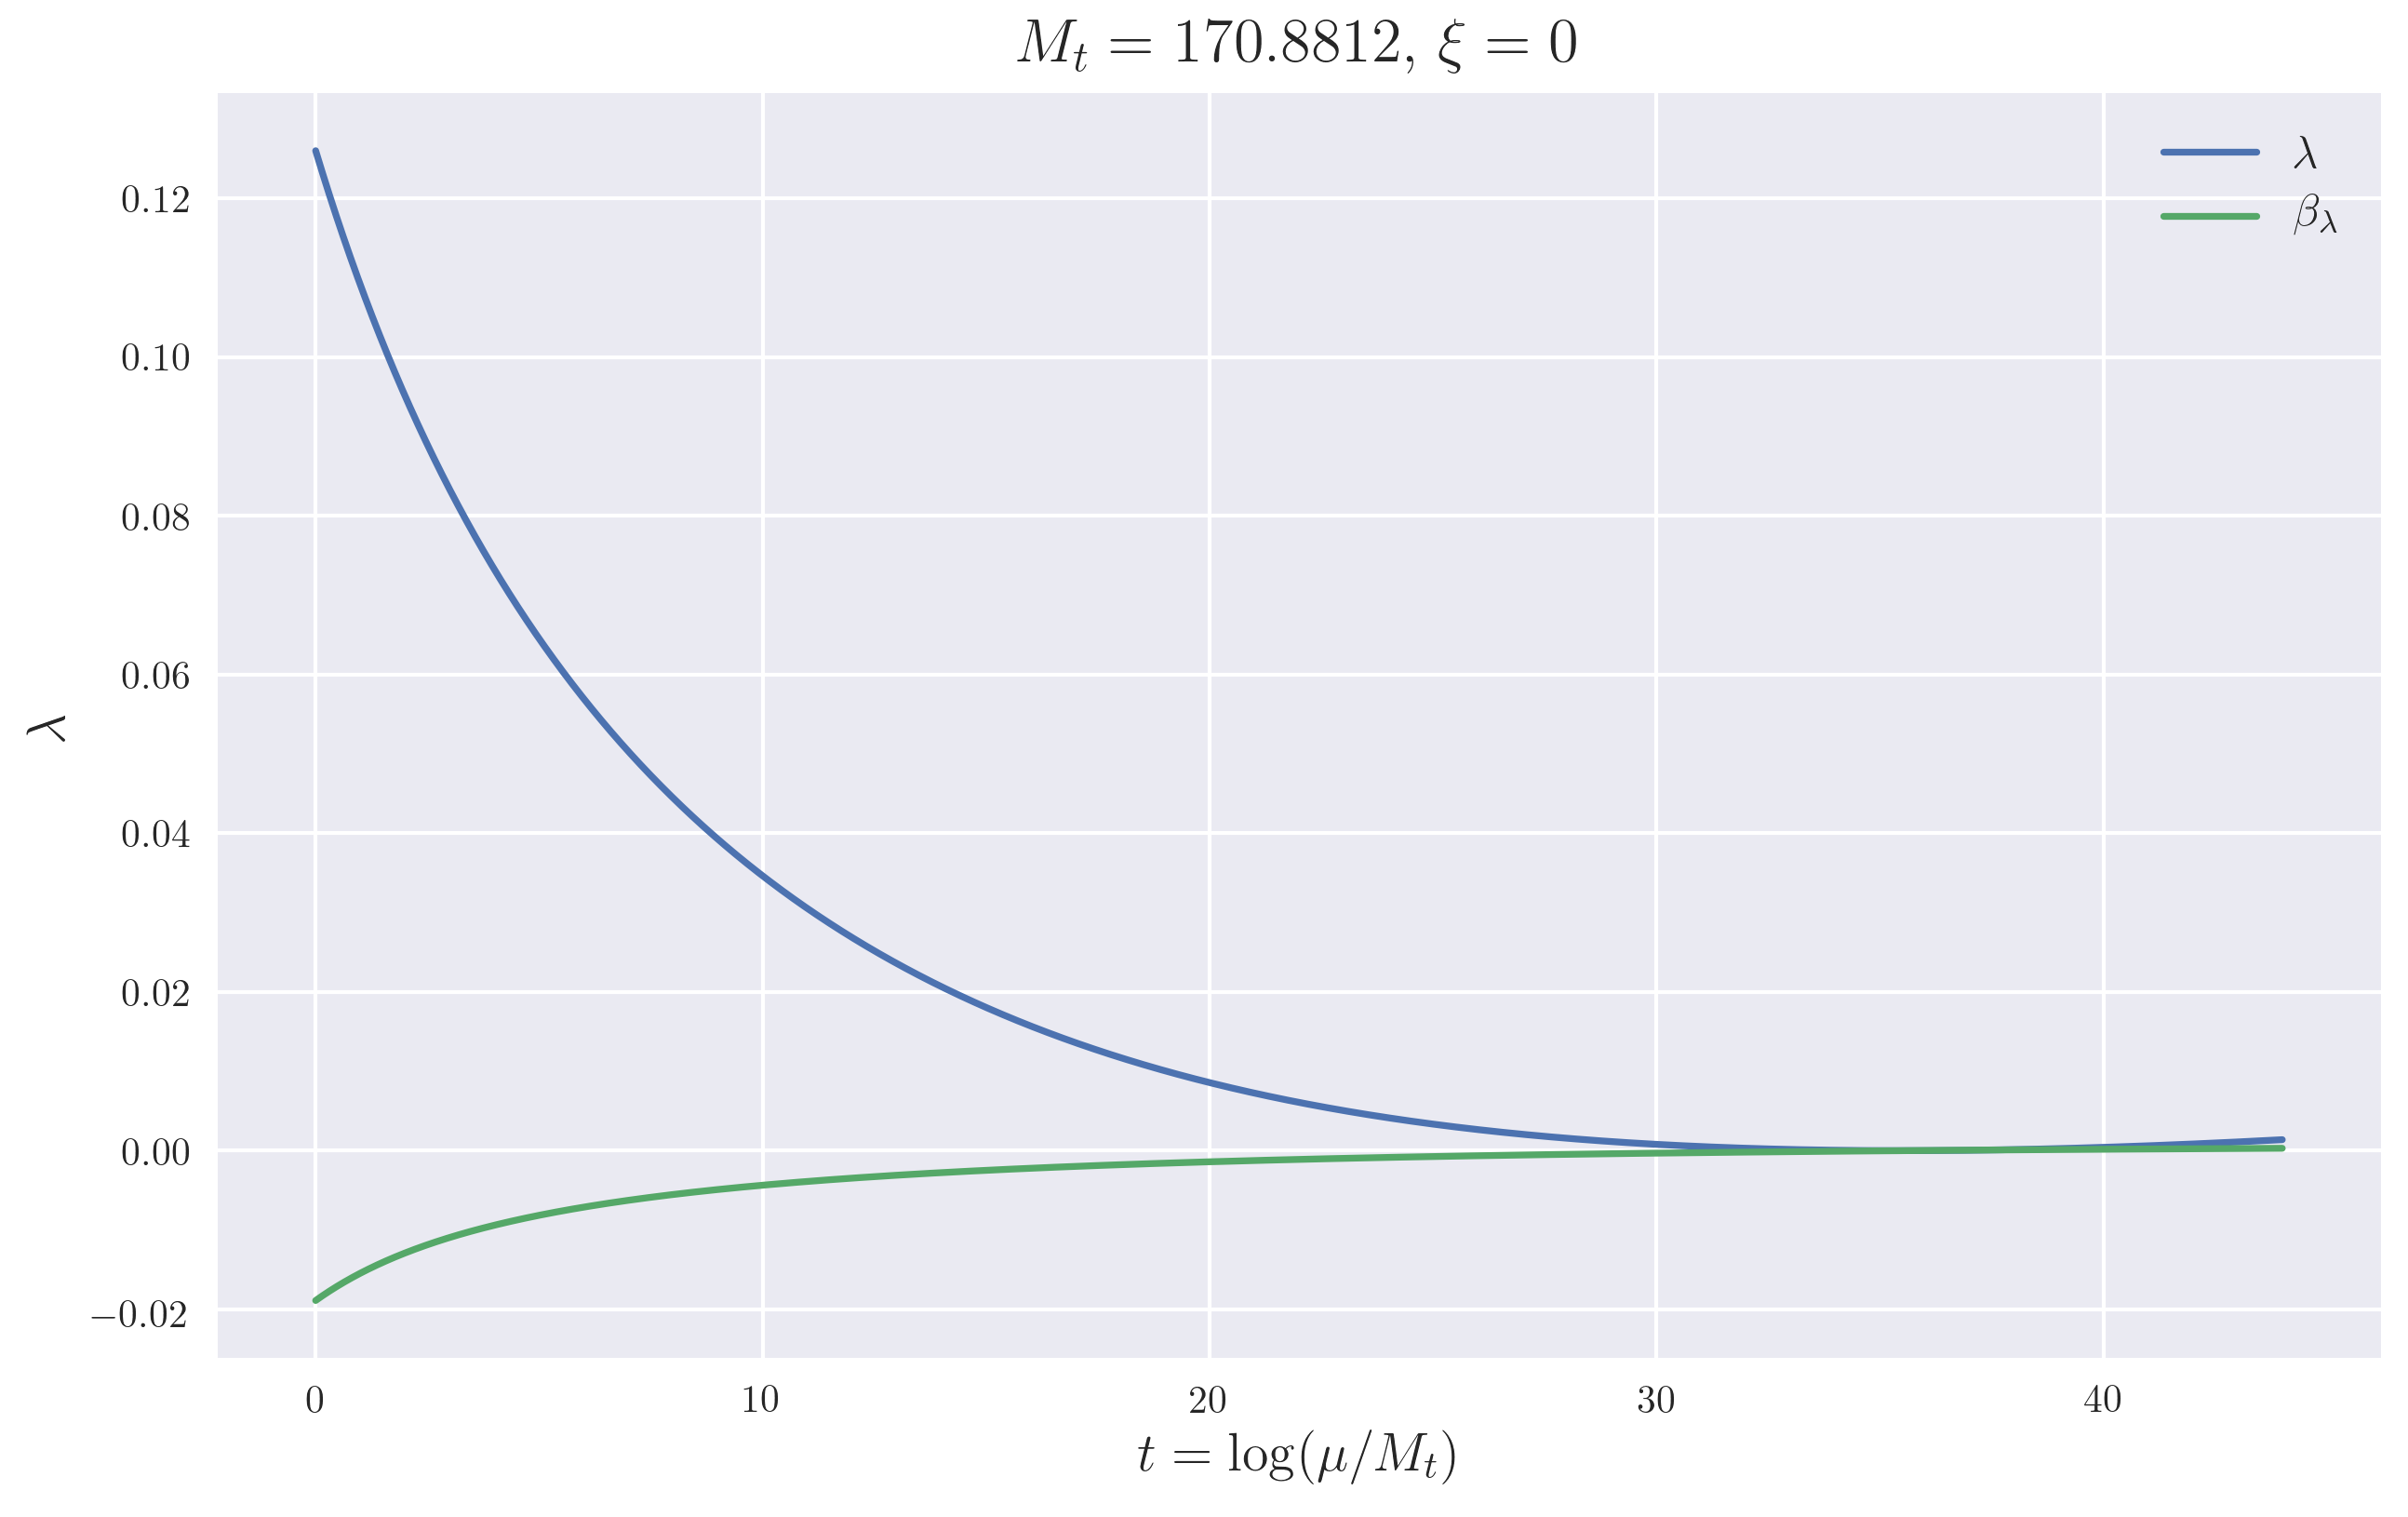

In [24]:
plt.figure(figsize=(10,6), dpi=300)
xi = 0
plt.plot(locals()['t_'+str(mt)+'_'+str(xi)], locals()['lH_'+str(mt)+'_'+str(xi)], label=r'$\lambda$')
plt.plot(locals()['t_'+str(mt)+'_'+str(xi)], locals()['BlH_'+str(mt)+'_'+str(xi)], label=r'$\beta_\lambda$')
plt.title(r'$M_t=170.8812,\,\xi='+str(xi)+'$', fontsize=16)
plt.xlabel(r'$t=\log(\mu/M_t)$', fontsize=14)
plt.ylabel(r'$\lambda$', fontsize=14)
#plt.axis([32.5, 39, 0.00015, 0.00045])
plt.legend(fontsize=12)
plt.show()

#### - More Specific

In [22]:
t_lh = 0
t_blh = 0
mt = 170.8812
xi = 0
# Lambda Minimum
lH_min = min(locals()['lH_'+str(mt)+'_'+str(xi)])
index_lh = np.where(locals()['lH_'+str(mt)+'_'+str(xi)] == lH_min)
# Beta == 0
index_Blh = np.where(np.logical_and(locals()['BlH_'+str(mt)+'_'+str(xi)] < 0.5e-08, locals()['BlH_'+str(mt)+'_'+str(xi)] > -0.5e-08))
# Corresponding t
t_lh = index_lh[0][0]
t_Blh = index_Blh[0][1]
t_lh = locals()['t_'+str(mt)+'_'+str(xi)][t_lh]
t_Blh = locals()['t_'+str(mt)+'_'+str(xi)][t_Blh]

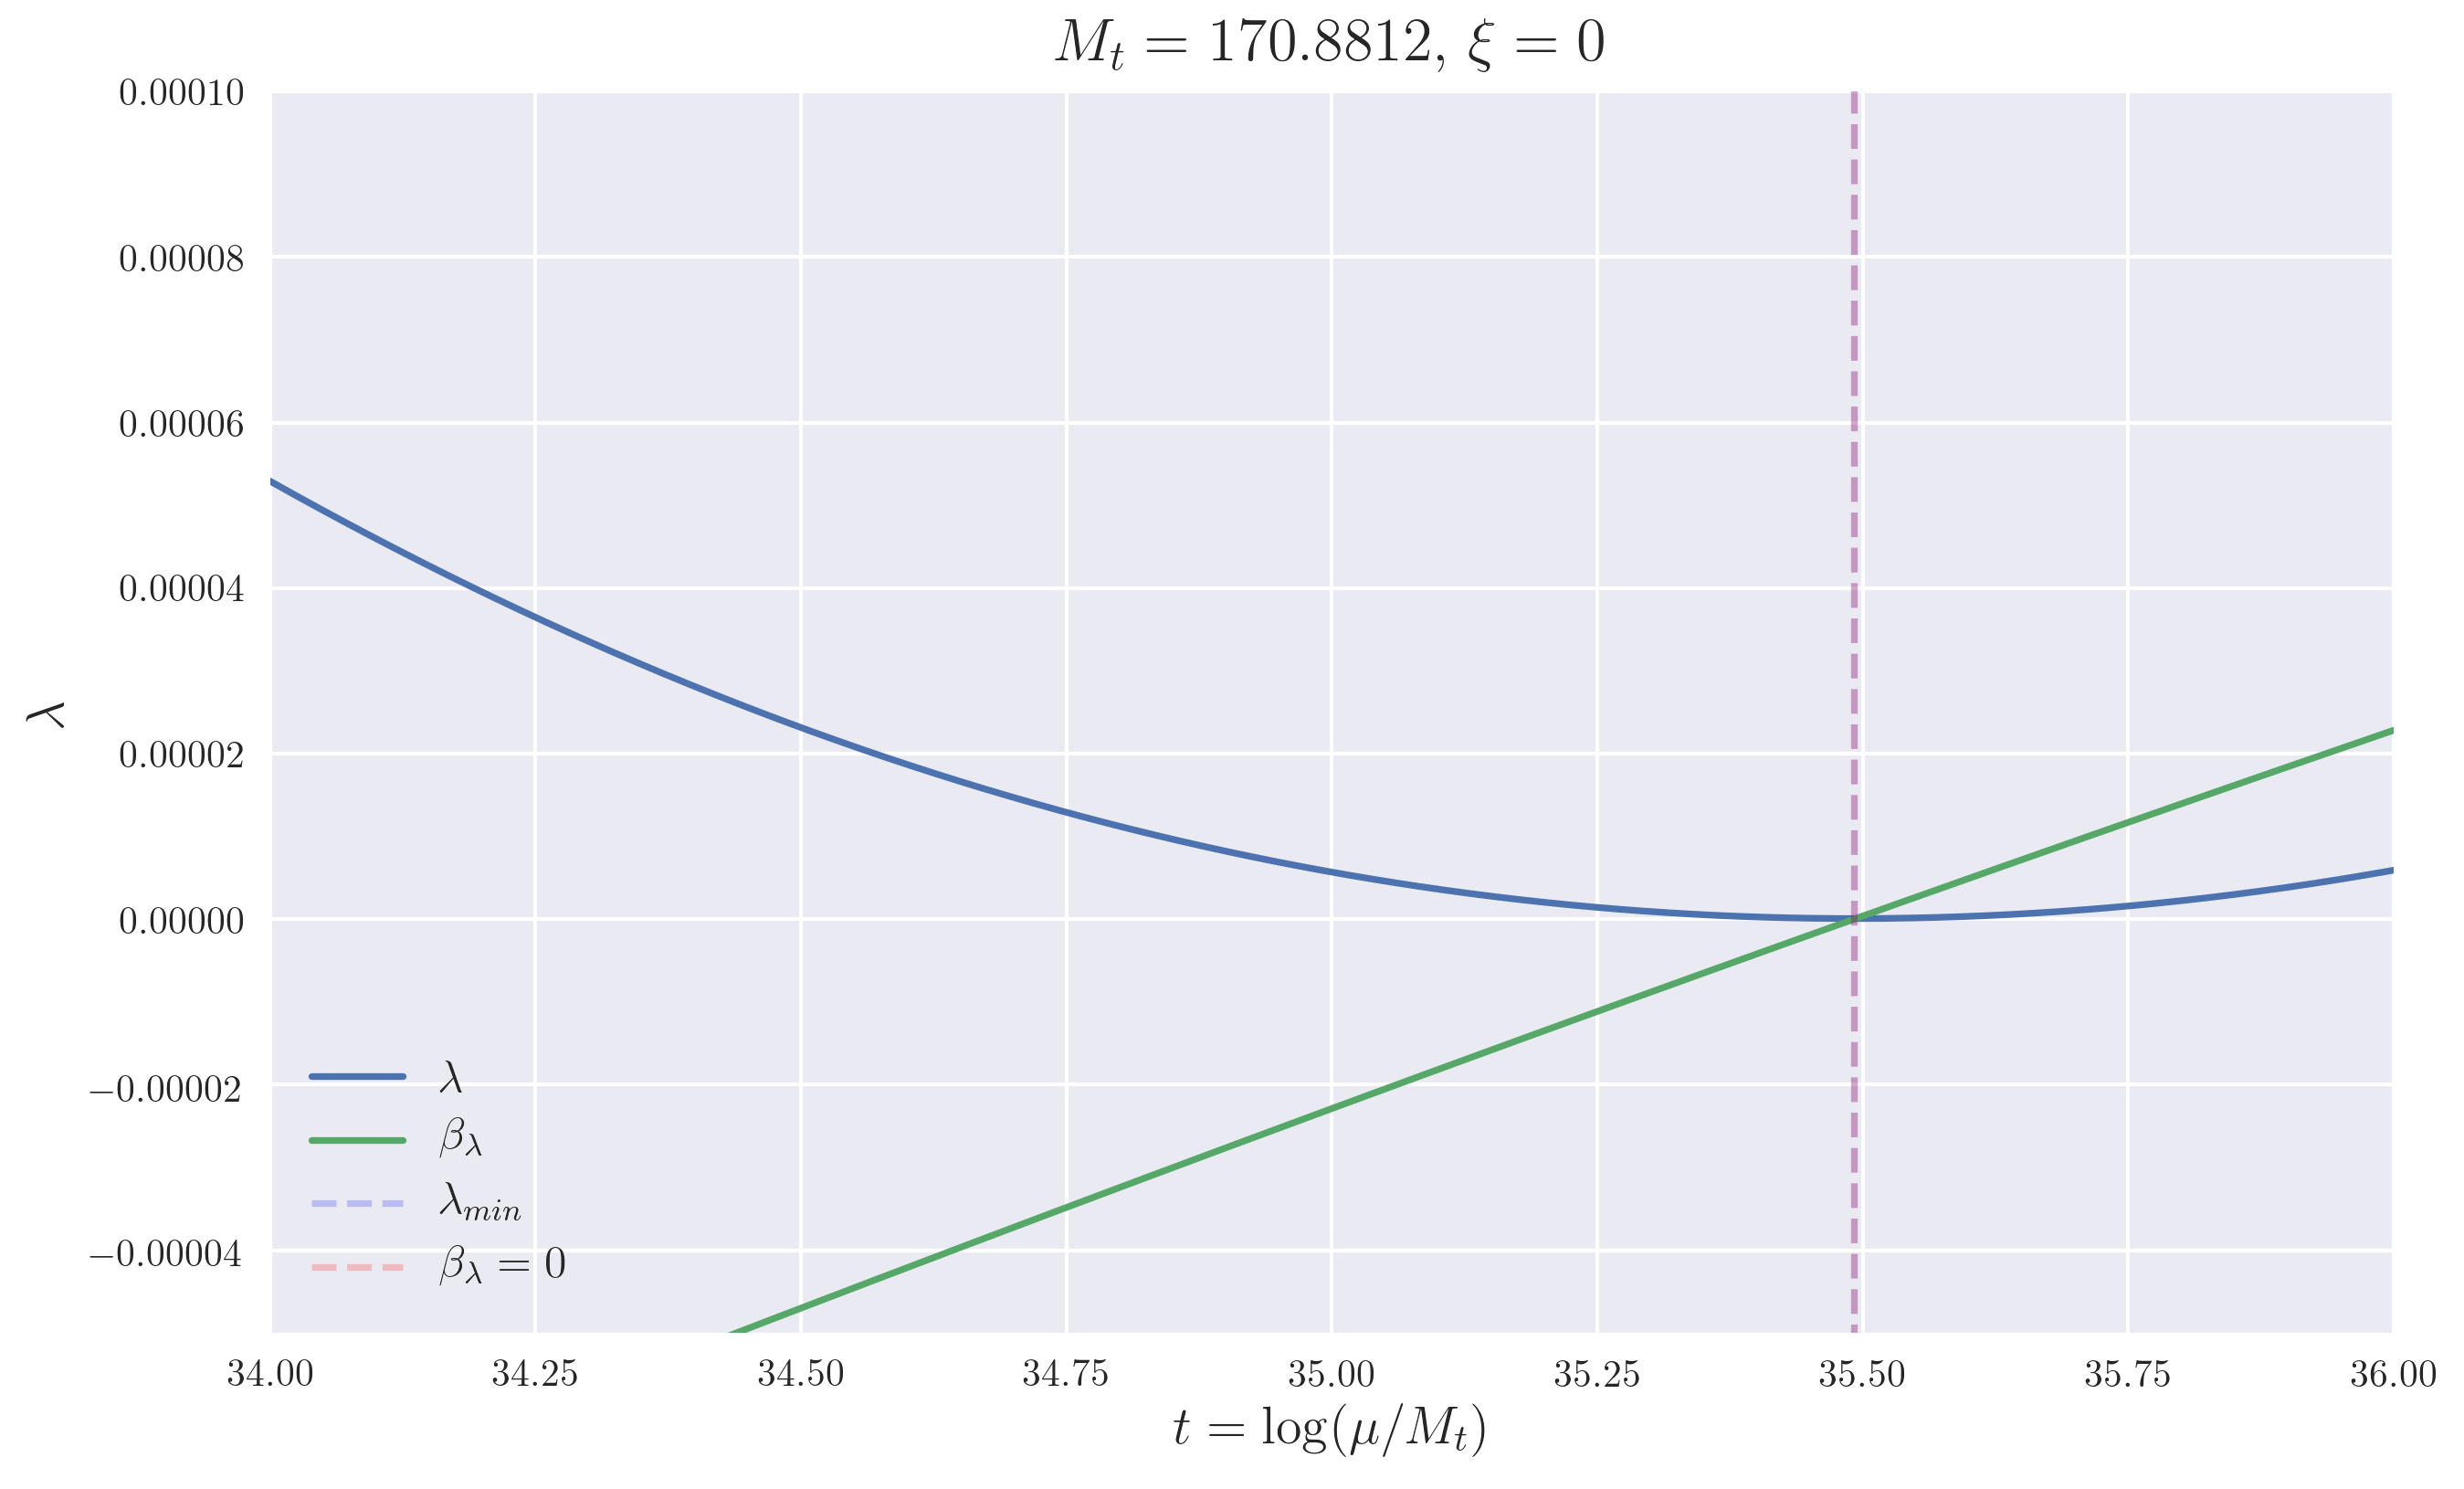

In [23]:
plt.figure(figsize=(10,6), dpi=300)
mt = 170.8812
xi = 0
plt.plot(locals()['t_'+str(mt)+'_'+str(xi)], locals()['lH_'+str(mt)+'_'+str(xi)], label=r'$\lambda$')
plt.plot(locals()['t_'+str(mt)+'_'+str(xi)], locals()['BlH_'+str(mt)+'_'+str(xi)], label=r'$\beta_\lambda$')
plt.plot((t_lh, t_lh),(-0.02, 0.12), 'b--', alpha=0.2, label=r'$\lambda_{min}$')
plt.plot((t_Blh, t_Blh), (-0.02, 0.12), 'r--', alpha=0.2, label=r'$\beta_\lambda = 0$')
plt.title(r'$M_t=170.8812,\,\xi='+str(xi)+'$', fontsize=16)
plt.xlabel(r'$t=\log(\mu/M_t)$', fontsize=14)
plt.ylabel(r'$\lambda$', fontsize=14)
plt.axis([34, 36, -0.00005, 0.0001])
plt.legend(fontsize=12)
plt.show()

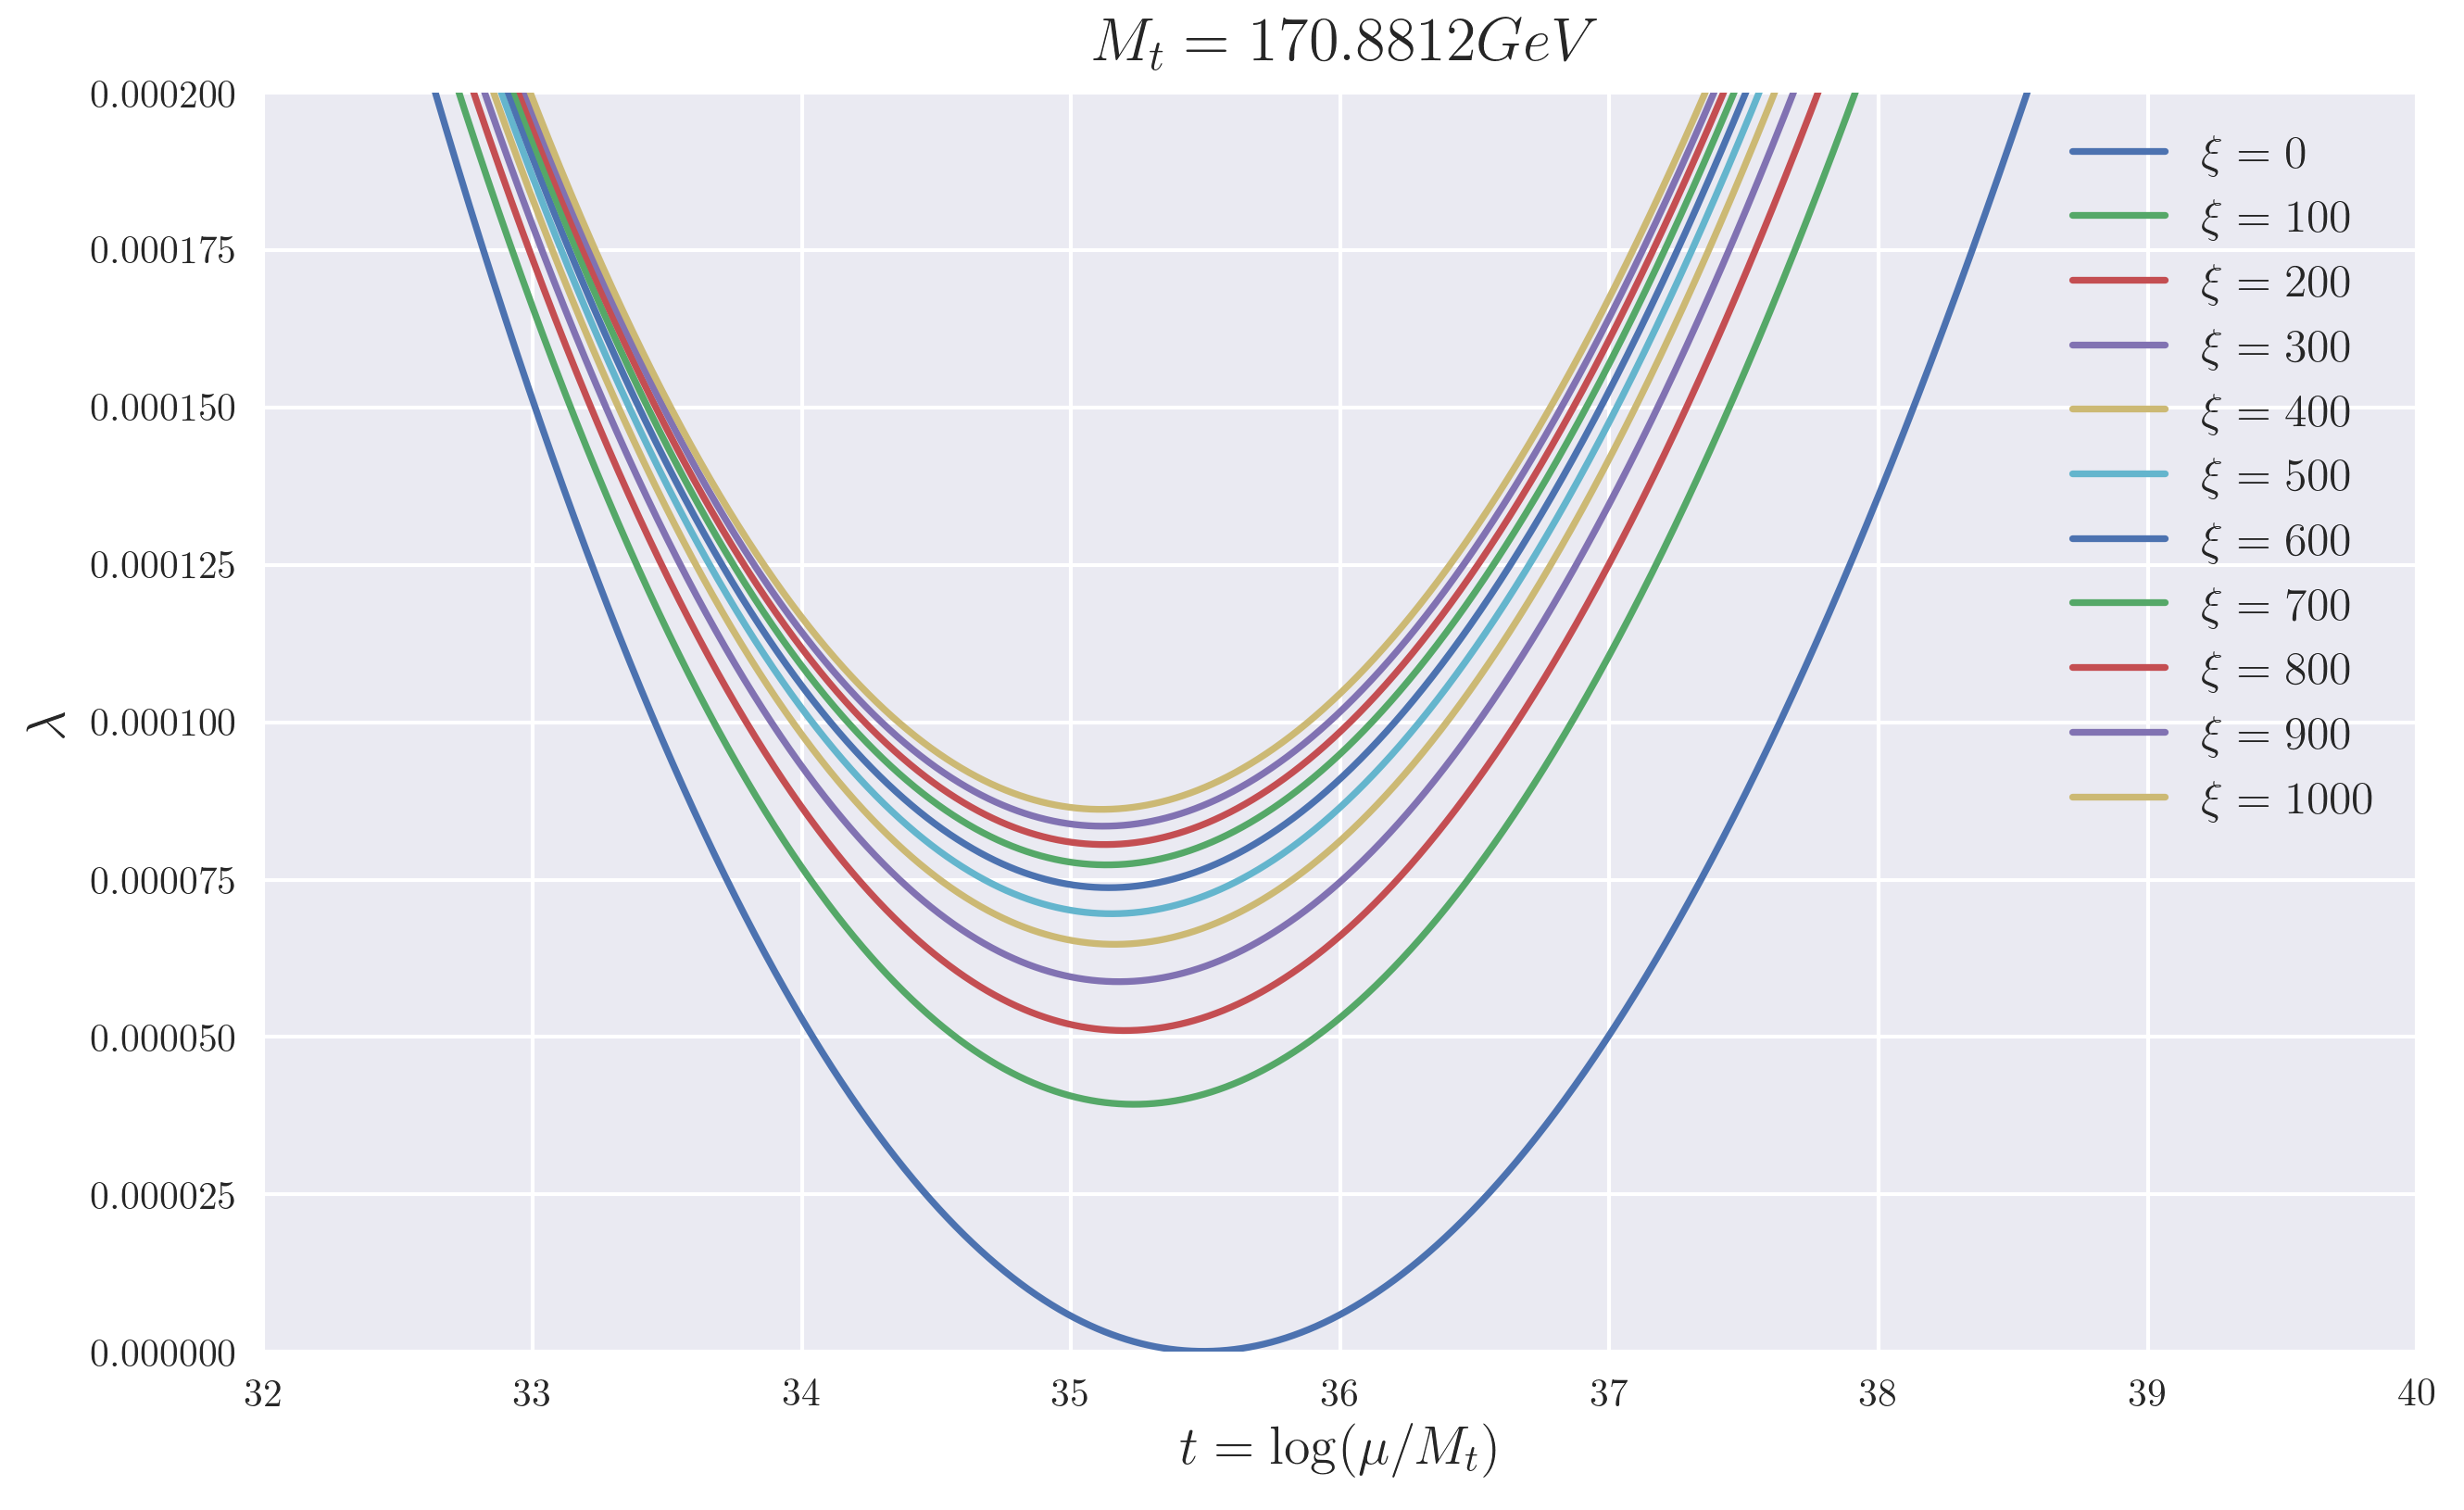

In [20]:
plt.figure(figsize=(10,6), dpi=300)
for mt in mt_keys:
    for xi in xi_keys:
        plt.plot(locals()['t_'+str(mt)+'_'+str(xi)], locals()['lH_'+str(mt)+'_'+str(xi)], label=r'$\xi='+str(xi)+'$')
plt.title(r'$M_t='+str(mt)+'GeV$', fontsize=16)
plt.xlabel(r'$t=\log(\mu/M_t)$', fontsize=14)
plt.ylabel(r'$\lambda$', fontsize=14)
plt.axis([32, 40, 0.0000, 0.0002])
plt.legend(fontsize=12)
plt.show()

#### - Conclusion
> Low $\xi$ makes $\lambda$ graph down $\rightarrow$ So, we should find low $\xi$

### 3) Running Gauge Couplings 

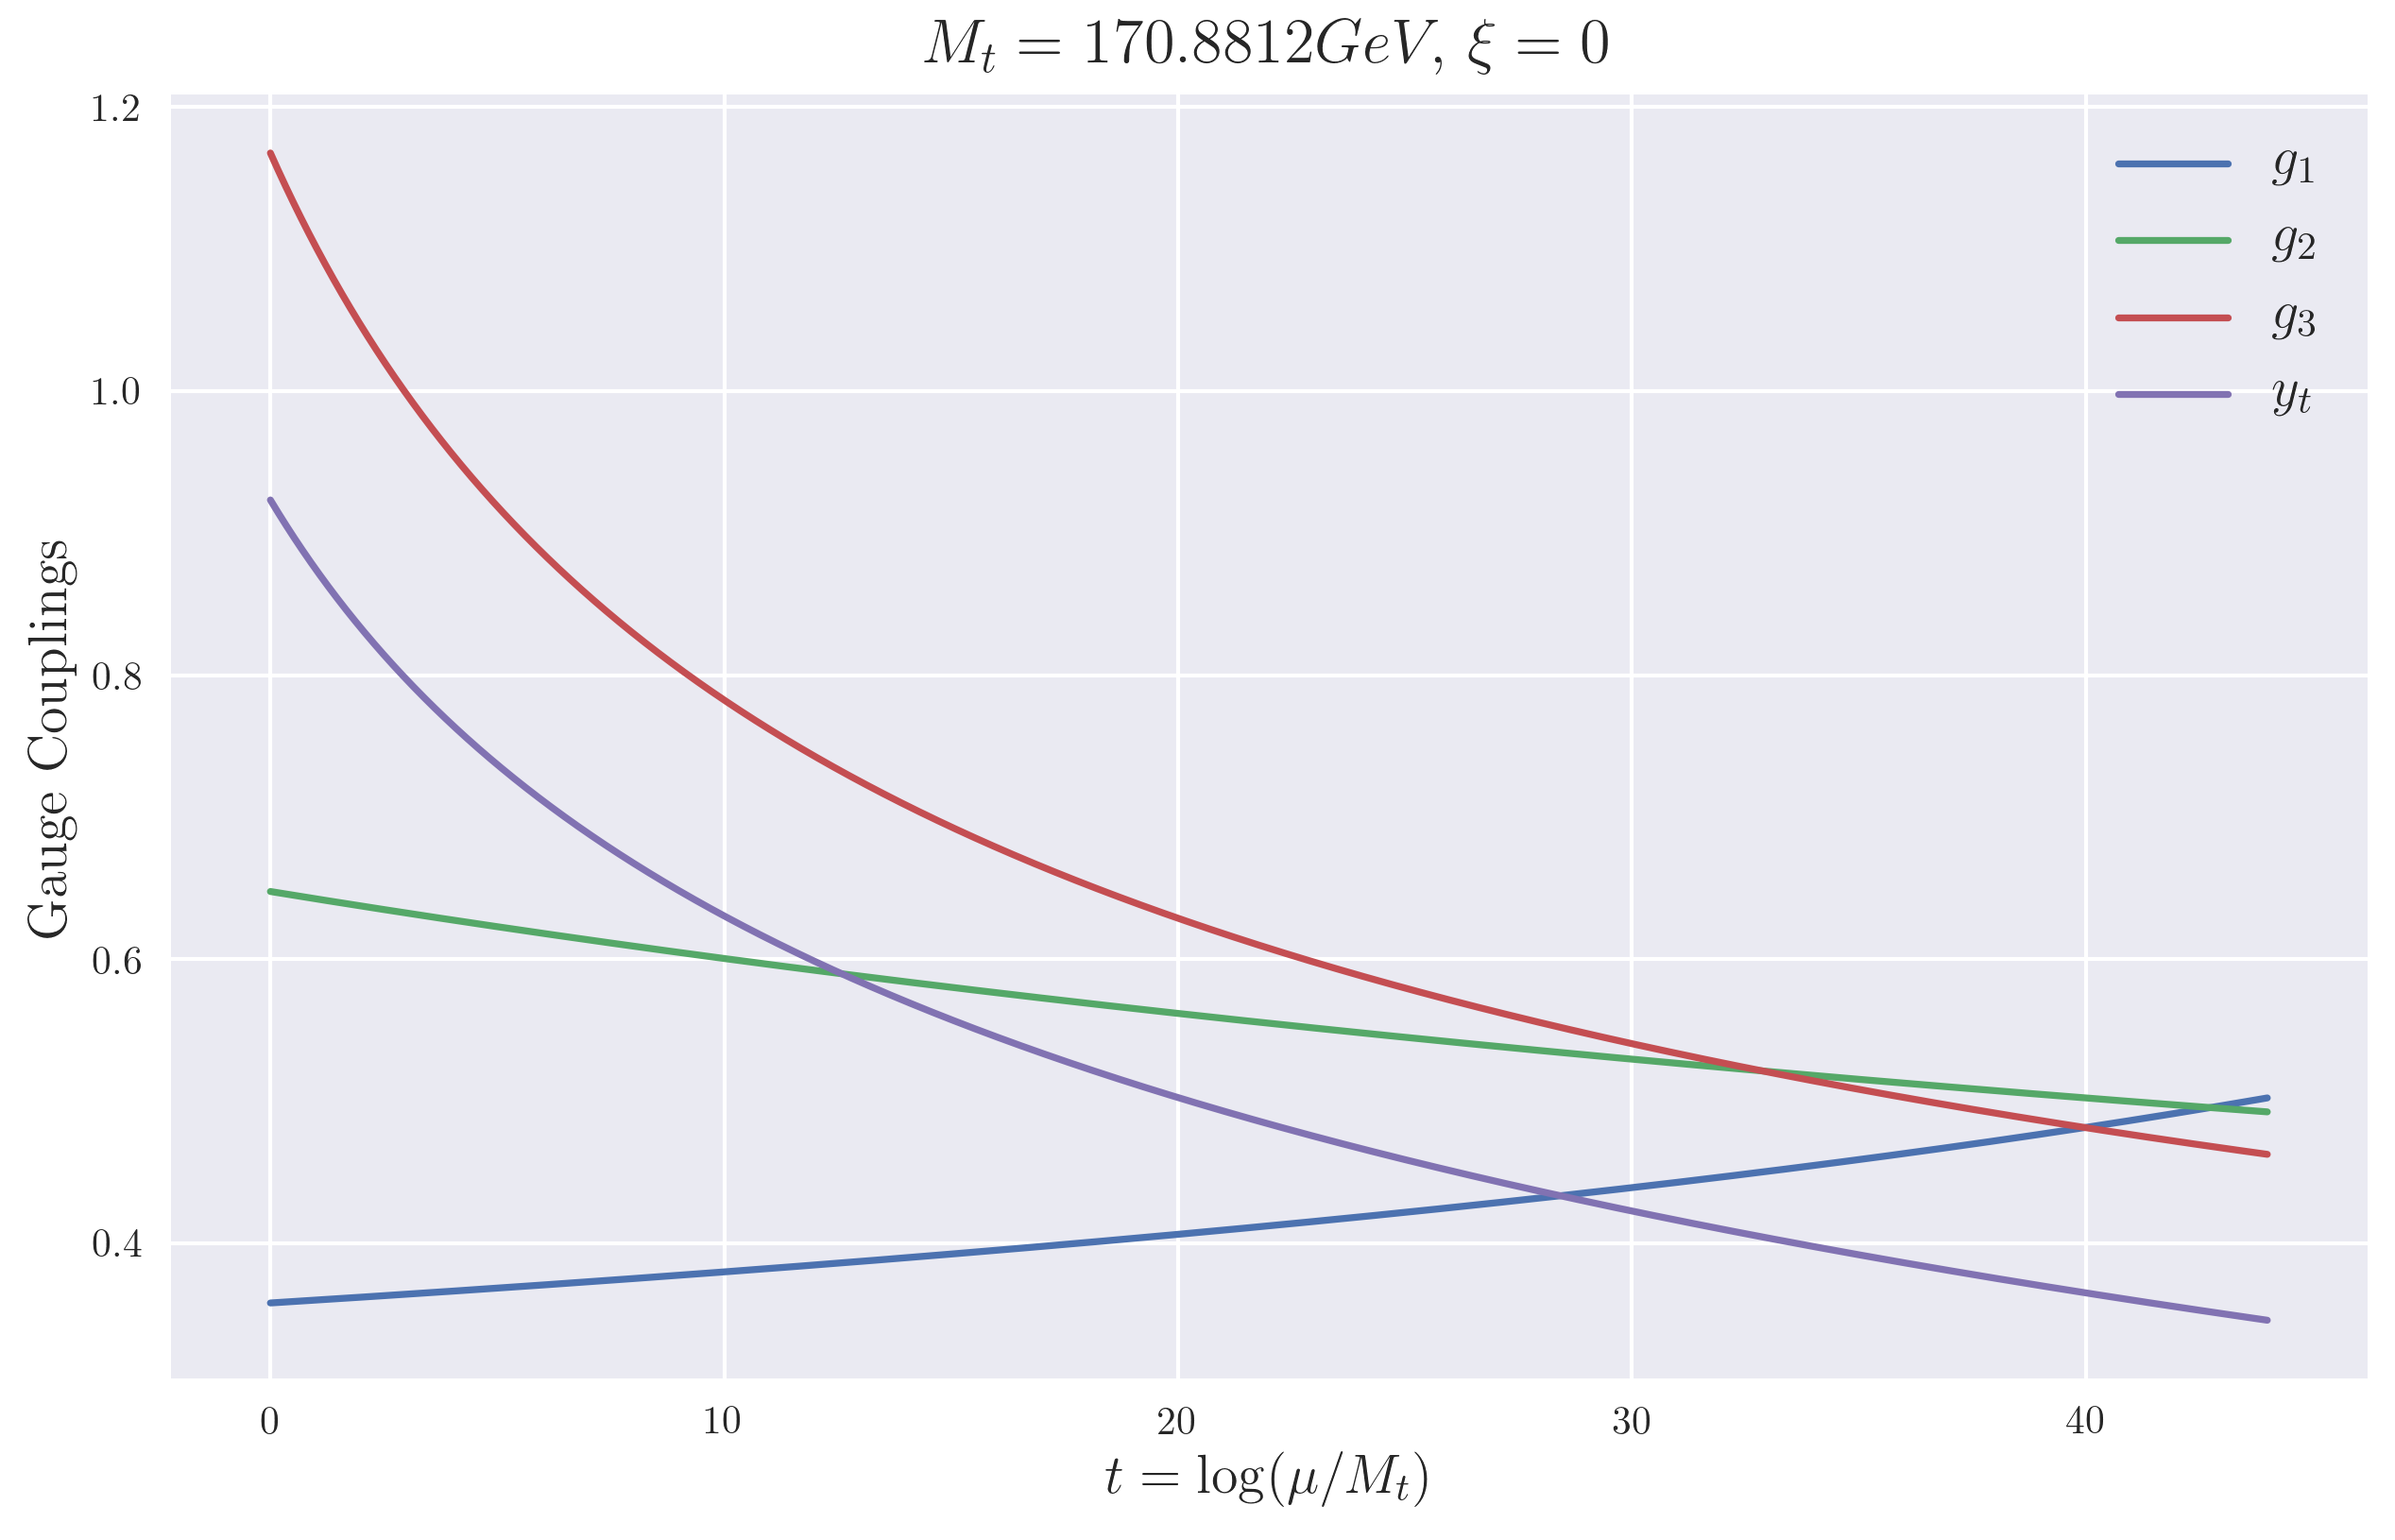

In [25]:
plt.figure(figsize=(10,6), dpi=300)
mt = 170.8812
xi = 0
plt.plot(locals()['t_'+str(mt)+'_'+str(xi)], locals()['g1_'+str(mt)+'_'+str(xi)], label=r'$g_1$')
plt.plot(locals()['t_'+str(mt)+'_'+str(xi)], locals()['g2_'+str(mt)+'_'+str(xi)], label=r'$g_2$')
plt.plot(locals()['t_'+str(mt)+'_'+str(xi)], locals()['g3_'+str(mt)+'_'+str(xi)], label=r'$g_3$')
plt.plot(locals()['t_'+str(mt)+'_'+str(xi)], locals()['yt_'+str(mt)+'_'+str(xi)], label=r'$y_t$')
plt.title(r'$M_t =170.8812GeV,\,\xi='+str(xi)+'$', fontsize=16)
plt.xlabel(r'$t=\log(\mu/M_t)$', fontsize=14)
plt.ylabel(r'Gauge Couplings', fontsize=14)
plt.legend(fontsize=14)
plt.show()

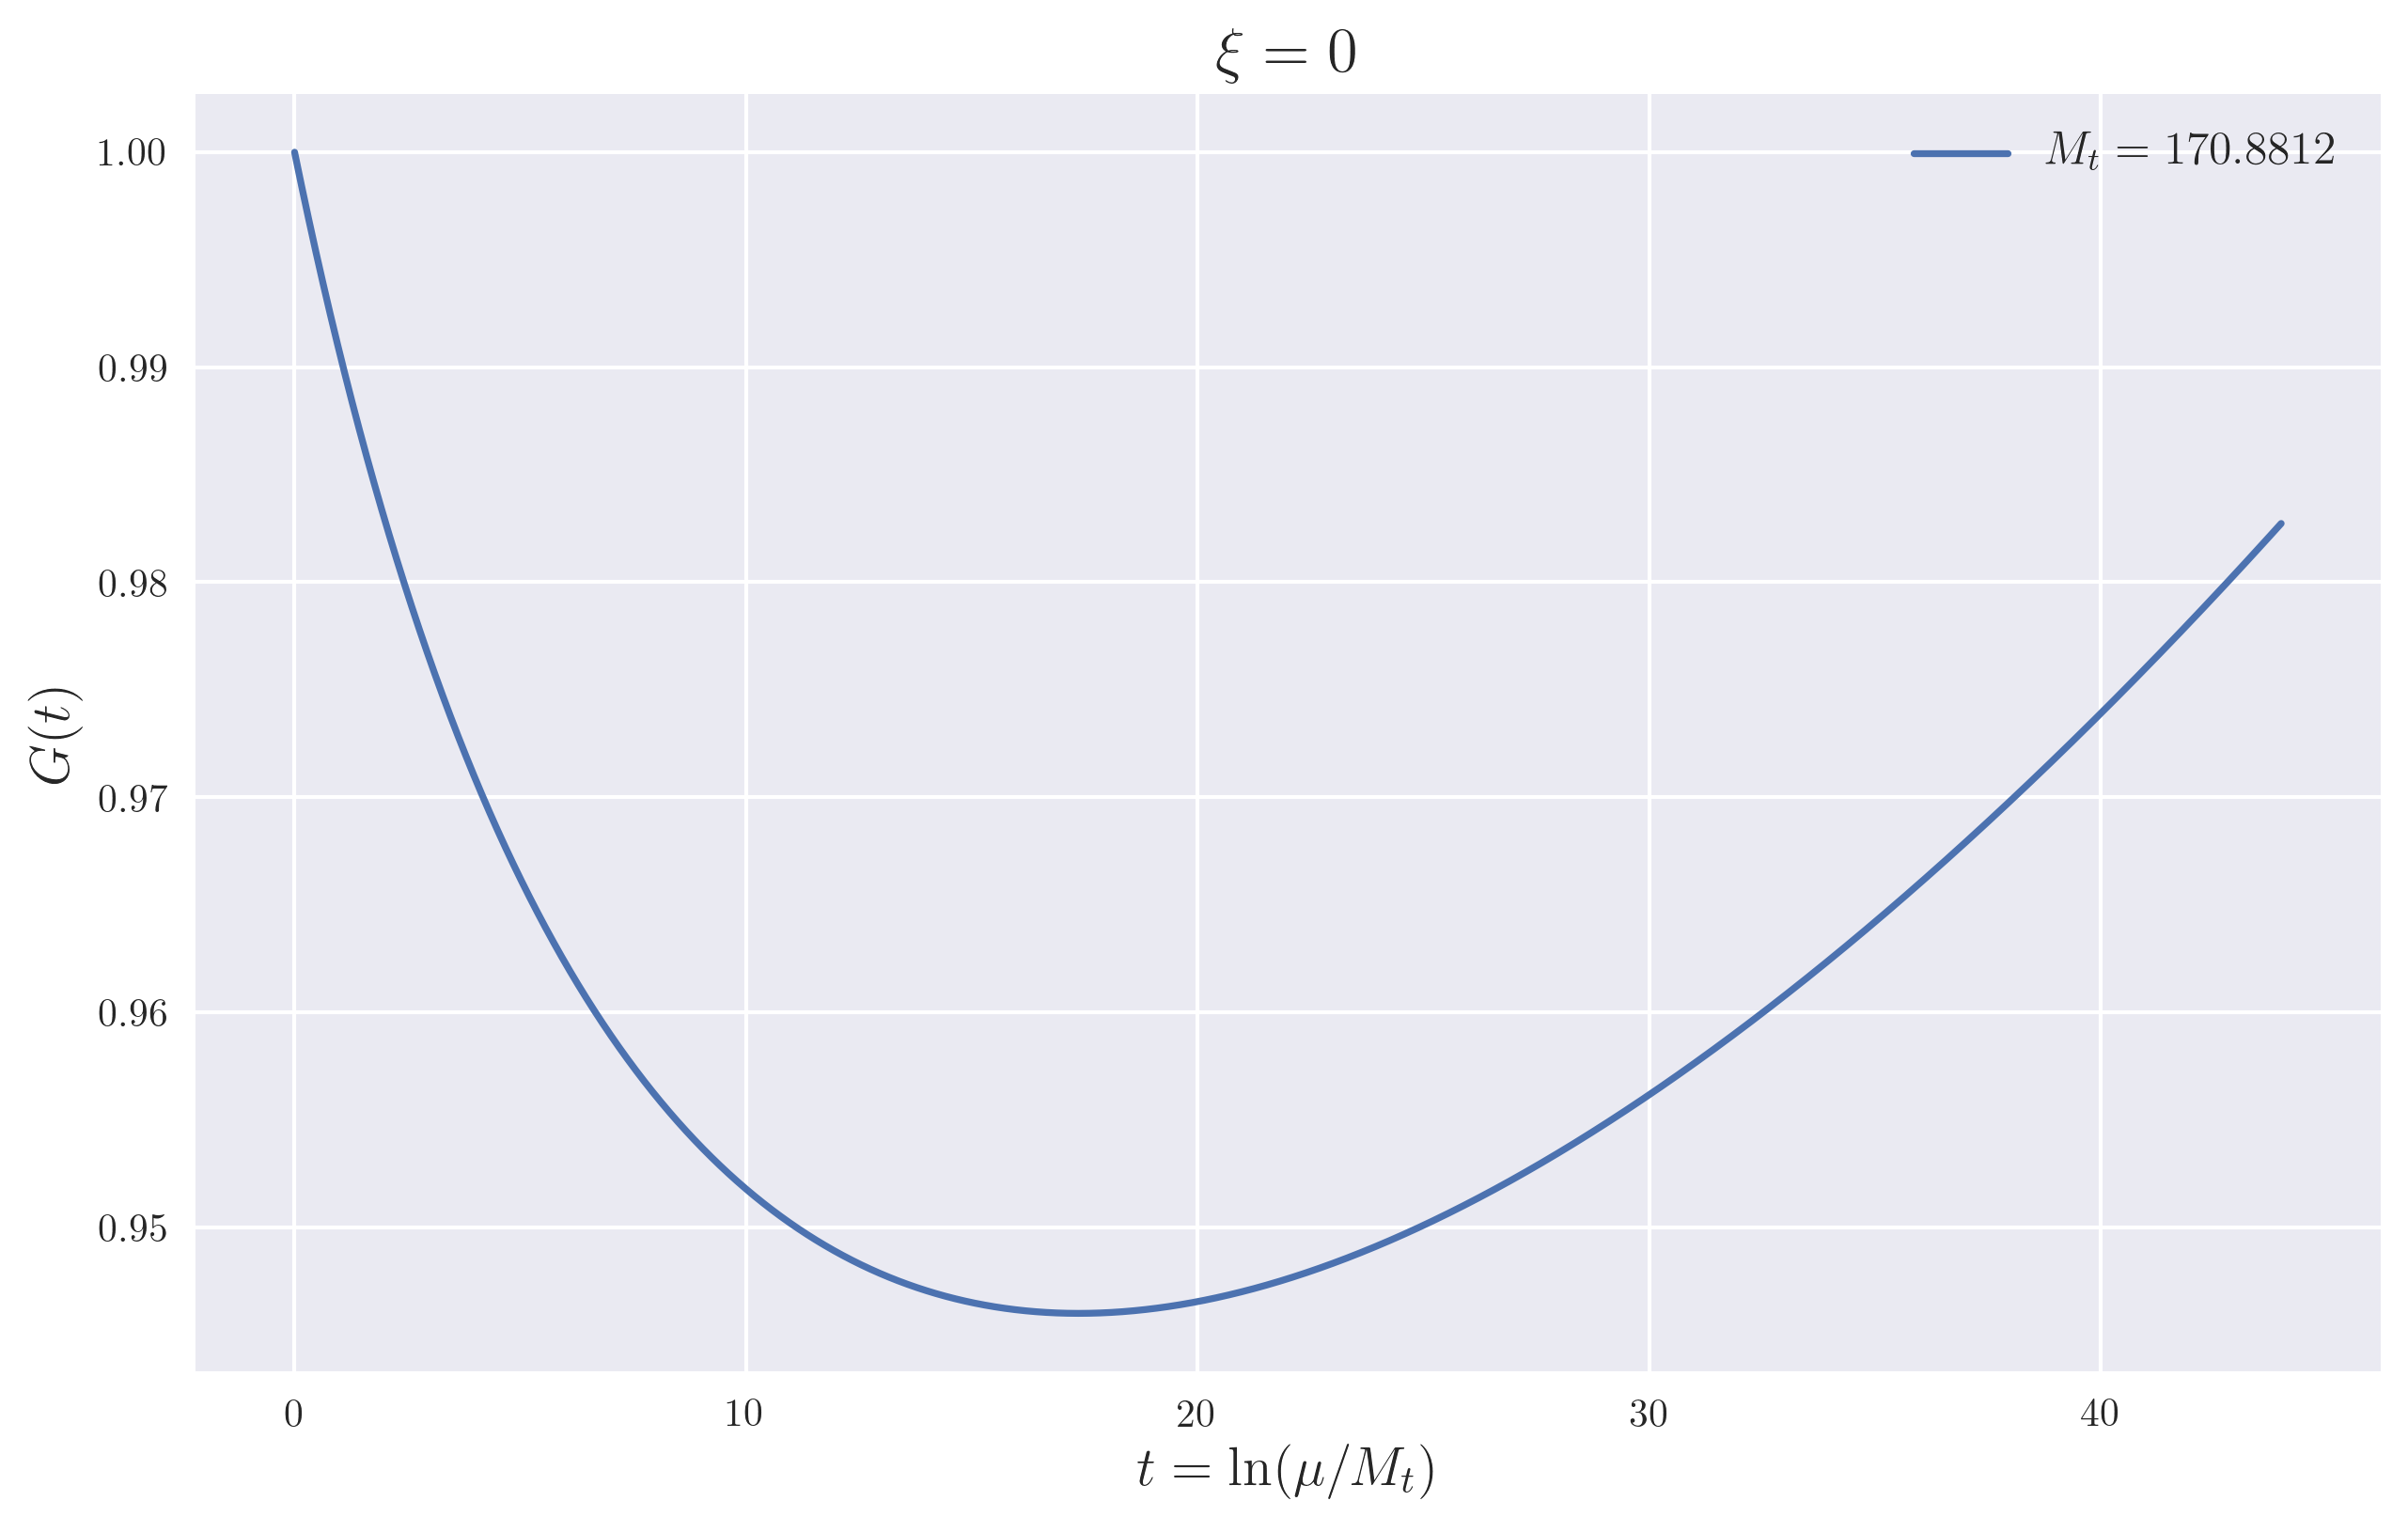

In [26]:
plt.figure(figsize=(10,6), dpi=300)
mt = 170.8812
xi = 0
plt.plot(locals()['t_'+str(mt)+'_'+str(xi)], locals()['G_'+str(mt)+'_'+str(xi)], label=r'$M_t='+str(mt)+'$')
plt.title(r'$\xi=0$', fontsize=16)
plt.xlabel(r'$t=\ln(\mu/M_t)$', fontsize=14)
plt.ylabel(r'$G(t)$', fontsize=14)
plt.legend(fontsize=12)
#plt.axis([0,2.4, 0, 2.5*10**(-8)])
plt.show()

#### - Conclusion
> Above graphs compatible to Mathematica's Results.

<h2><a name="#potential">3. Potential</a></h2>

<h3>1) Normalize Data (in units of $M_p^n$)</h3>

In [27]:
for mt in mt_keys:
    for xi in xi_keys:
        locals()['Rphi_'+str(mt)+'_'+str(xi)] = Normalize(locals()['phi_'+str(mt)+'_'+str(xi)],1)
        locals()['RV_'+str(mt)+'_'+str(xi)] = Normalize(locals()['V_'+str(mt)+'_'+str(xi)],4)

<h3>2) Graph</h3>

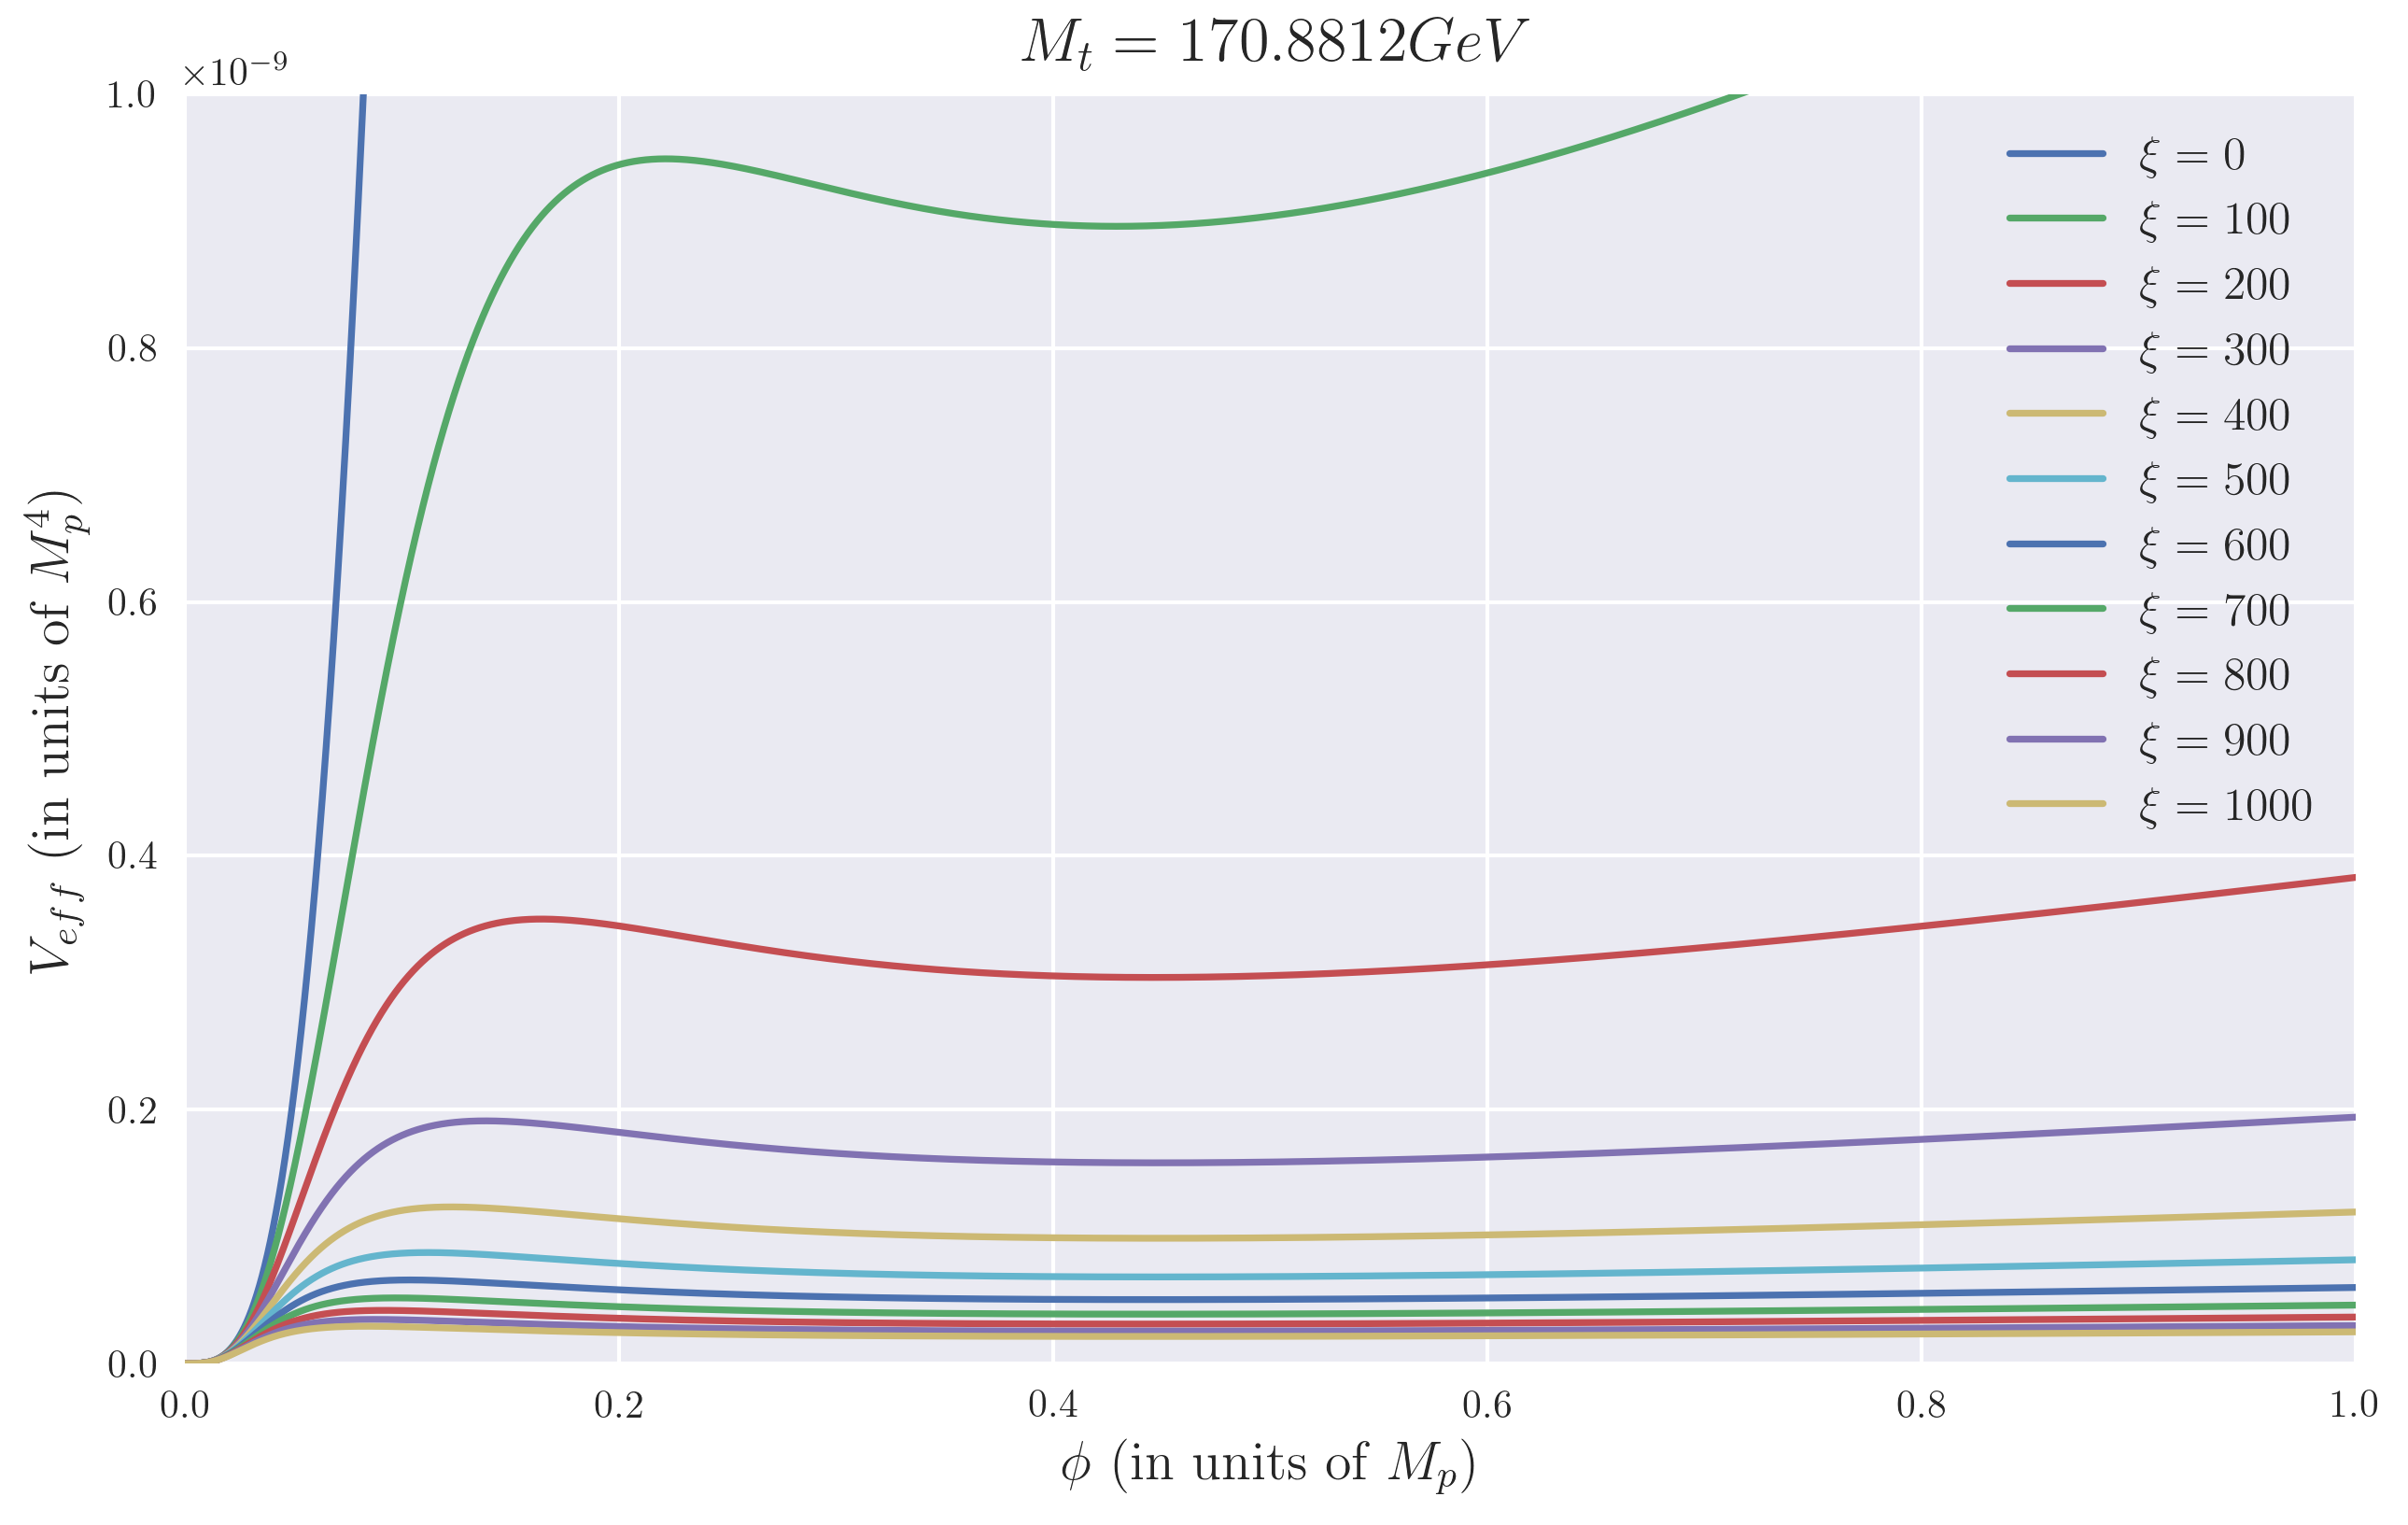

In [36]:
plt.figure(figsize=(10,6), dpi=300)
mt = 170.8812
for xi in xi_keys:
    plt.plot(locals()['Rphi_'+str(mt)+'_'+str(xi)], locals()['RV_'+str(mt)+'_'+str(xi)], label=r'$\xi='+str(xi)+'$')
plt.title(r'$M_t='+str(mt)+'GeV$', fontsize=16)
plt.xlabel(r'$\phi$ (in units of $M_p$)', fontsize=14)
plt.ylabel(r'$V_{eff}$ (in units of $M_p^4$)', fontsize=14)
plt.legend(fontsize=12)
plt.axis([0,1, 0, 1*10**(-9)])
plt.show()

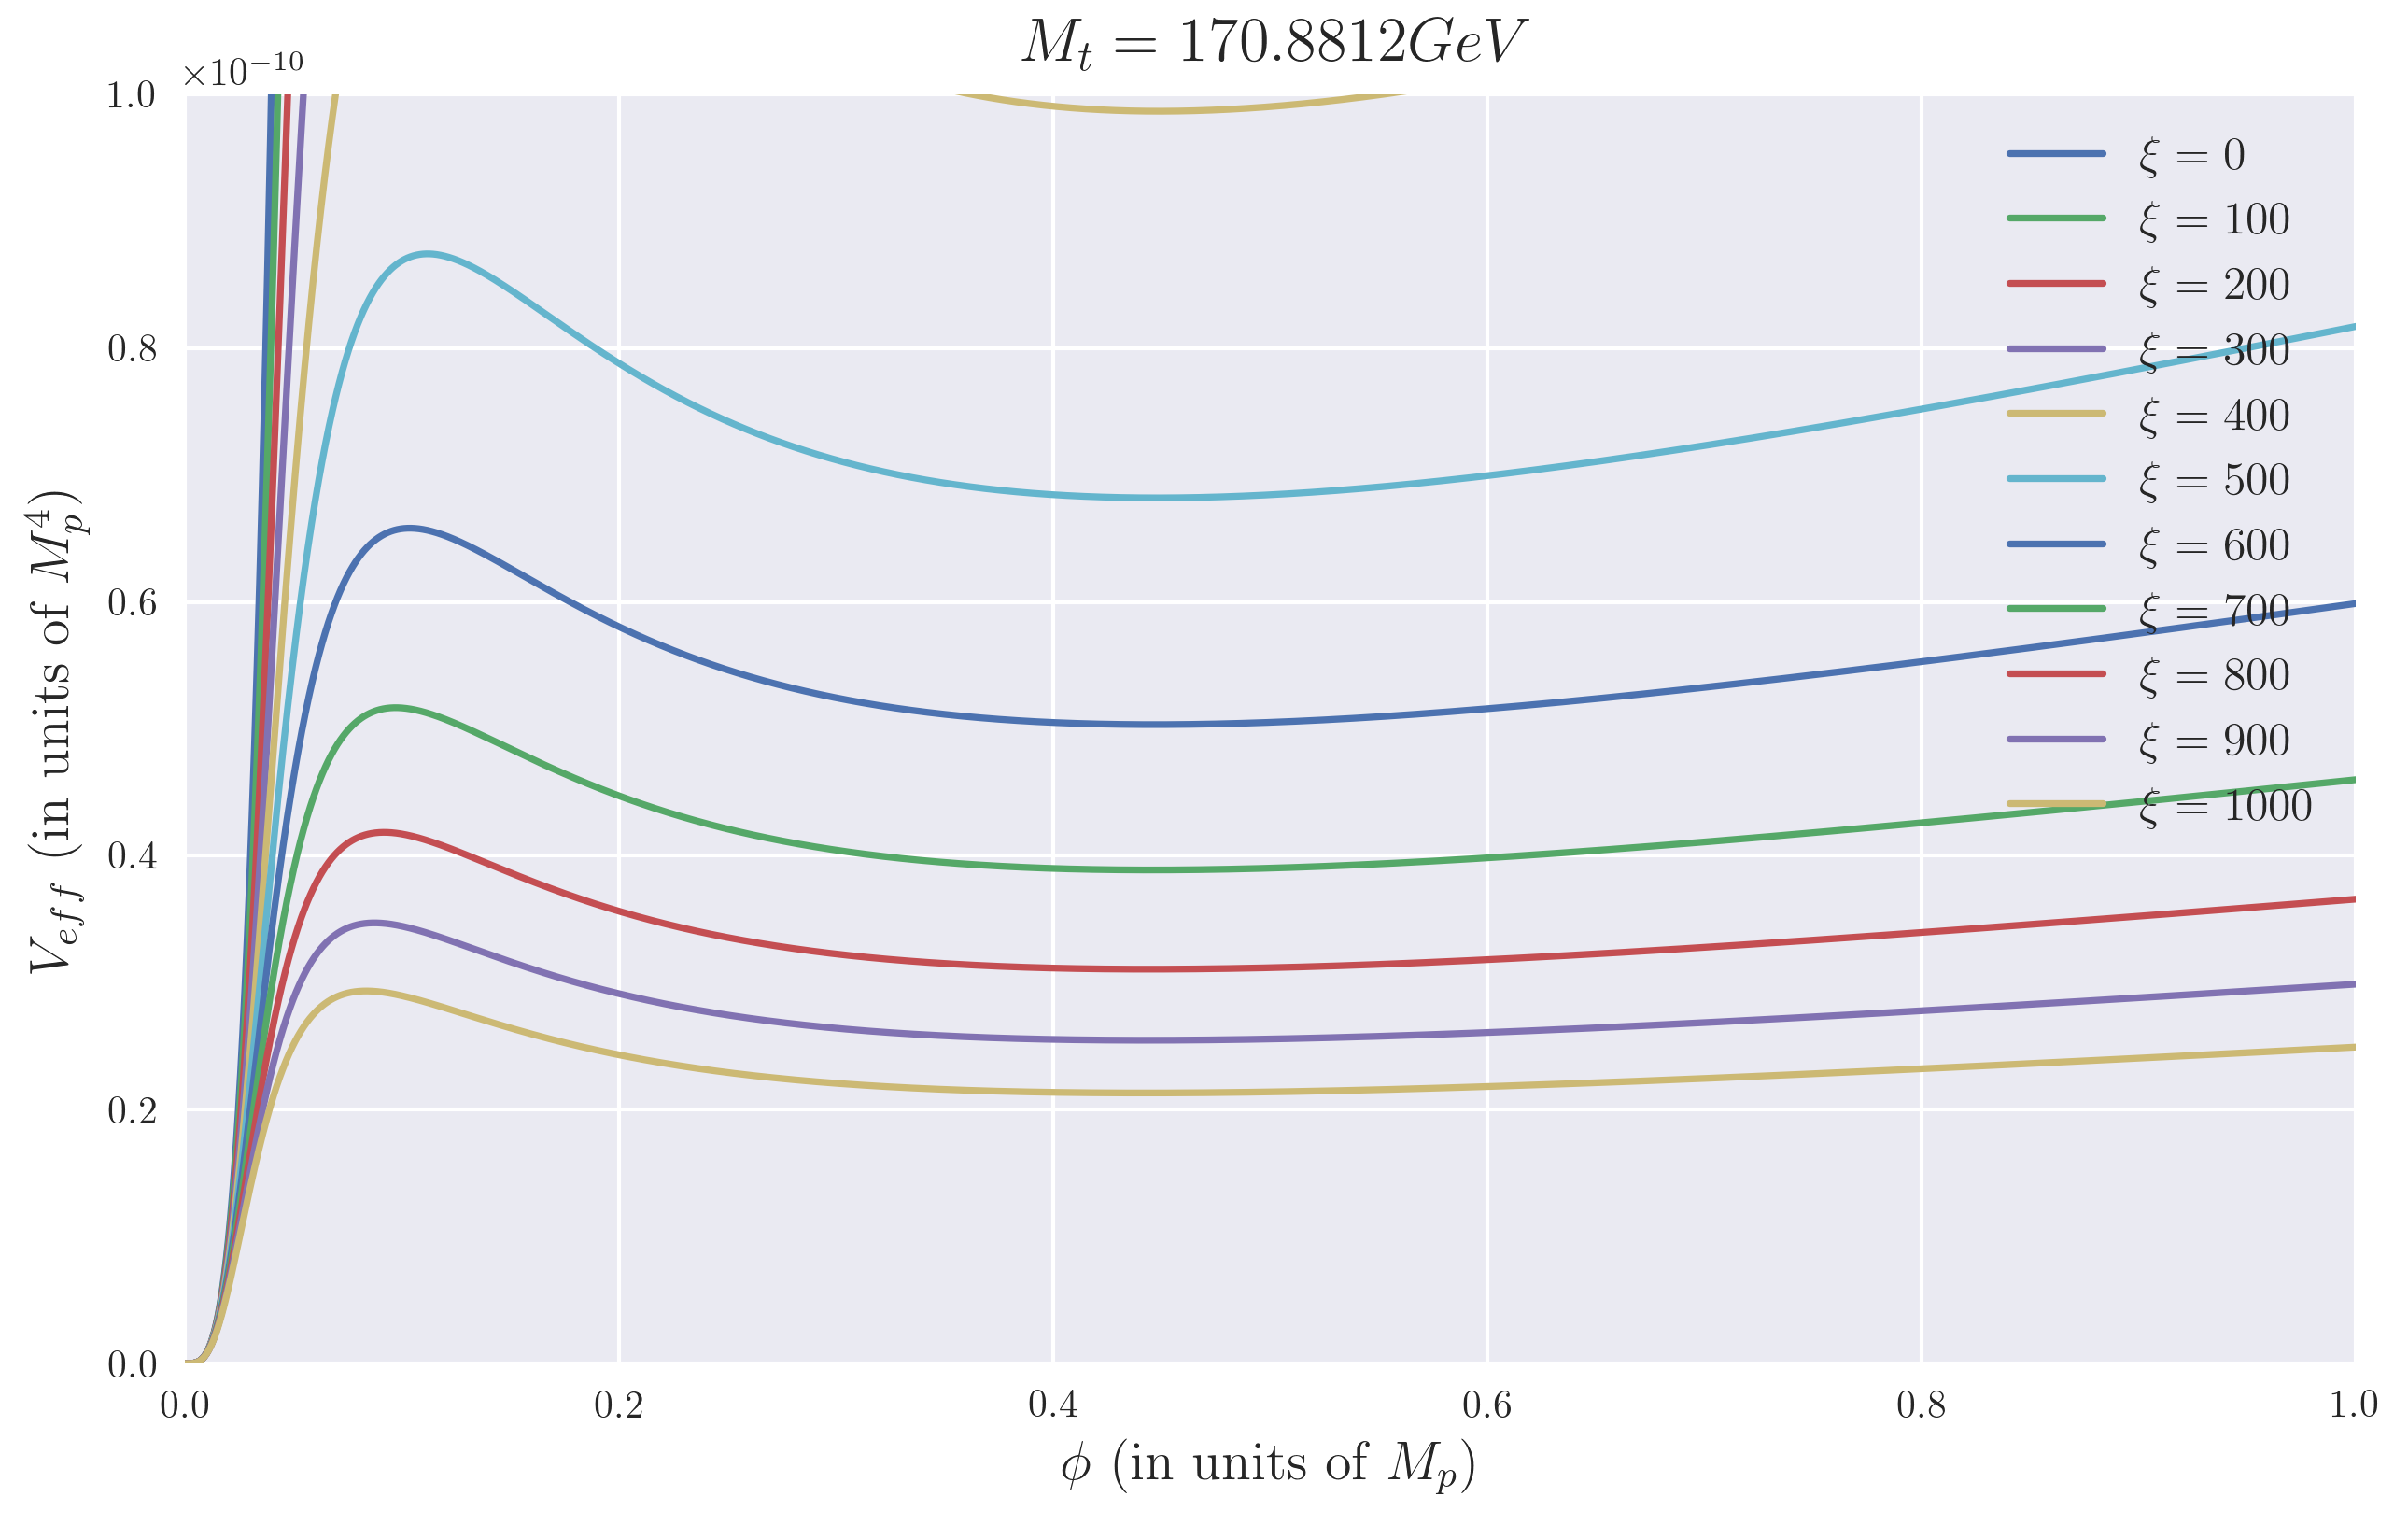

In [37]:
plt.figure(figsize=(10,6), dpi=300)
for xi in xi_keys:
    plt.plot(locals()['Rphi_'+str(mt)+'_'+str(xi)], locals()['RV_'+str(mt)+'_'+str(xi)], label=r'$\xi='+str(xi)+'$')
plt.title(r'$M_t='+str(mt)+'GeV$', fontsize=16)
plt.xlabel(r'$\phi$ (in units of $M_p$)', fontsize=14)
plt.ylabel(r'$V_{eff}$ (in units of $M_p^4$)', fontsize=14)
plt.legend(fontsize=12)
plt.axis([0,1, 0, 0.1*10**(-9)])
plt.show()

#### - Conclusion
> Low $\xi$ raises potential graph. So, too low $\xi$ is not good.

<h2><a name='#ssr'>3. Slow-Roll Parameters</a></h2> 

In [43]:
mt = 170.8812
for xi in xi_keys:
    locals()['E_'+str(mt)+'_'+str(xi)] = Eps(locals()['RV_'+str(mt)+'_'+str(xi)], locals()['Rphi_'+str(mt)+'_'+str(xi)], xi)

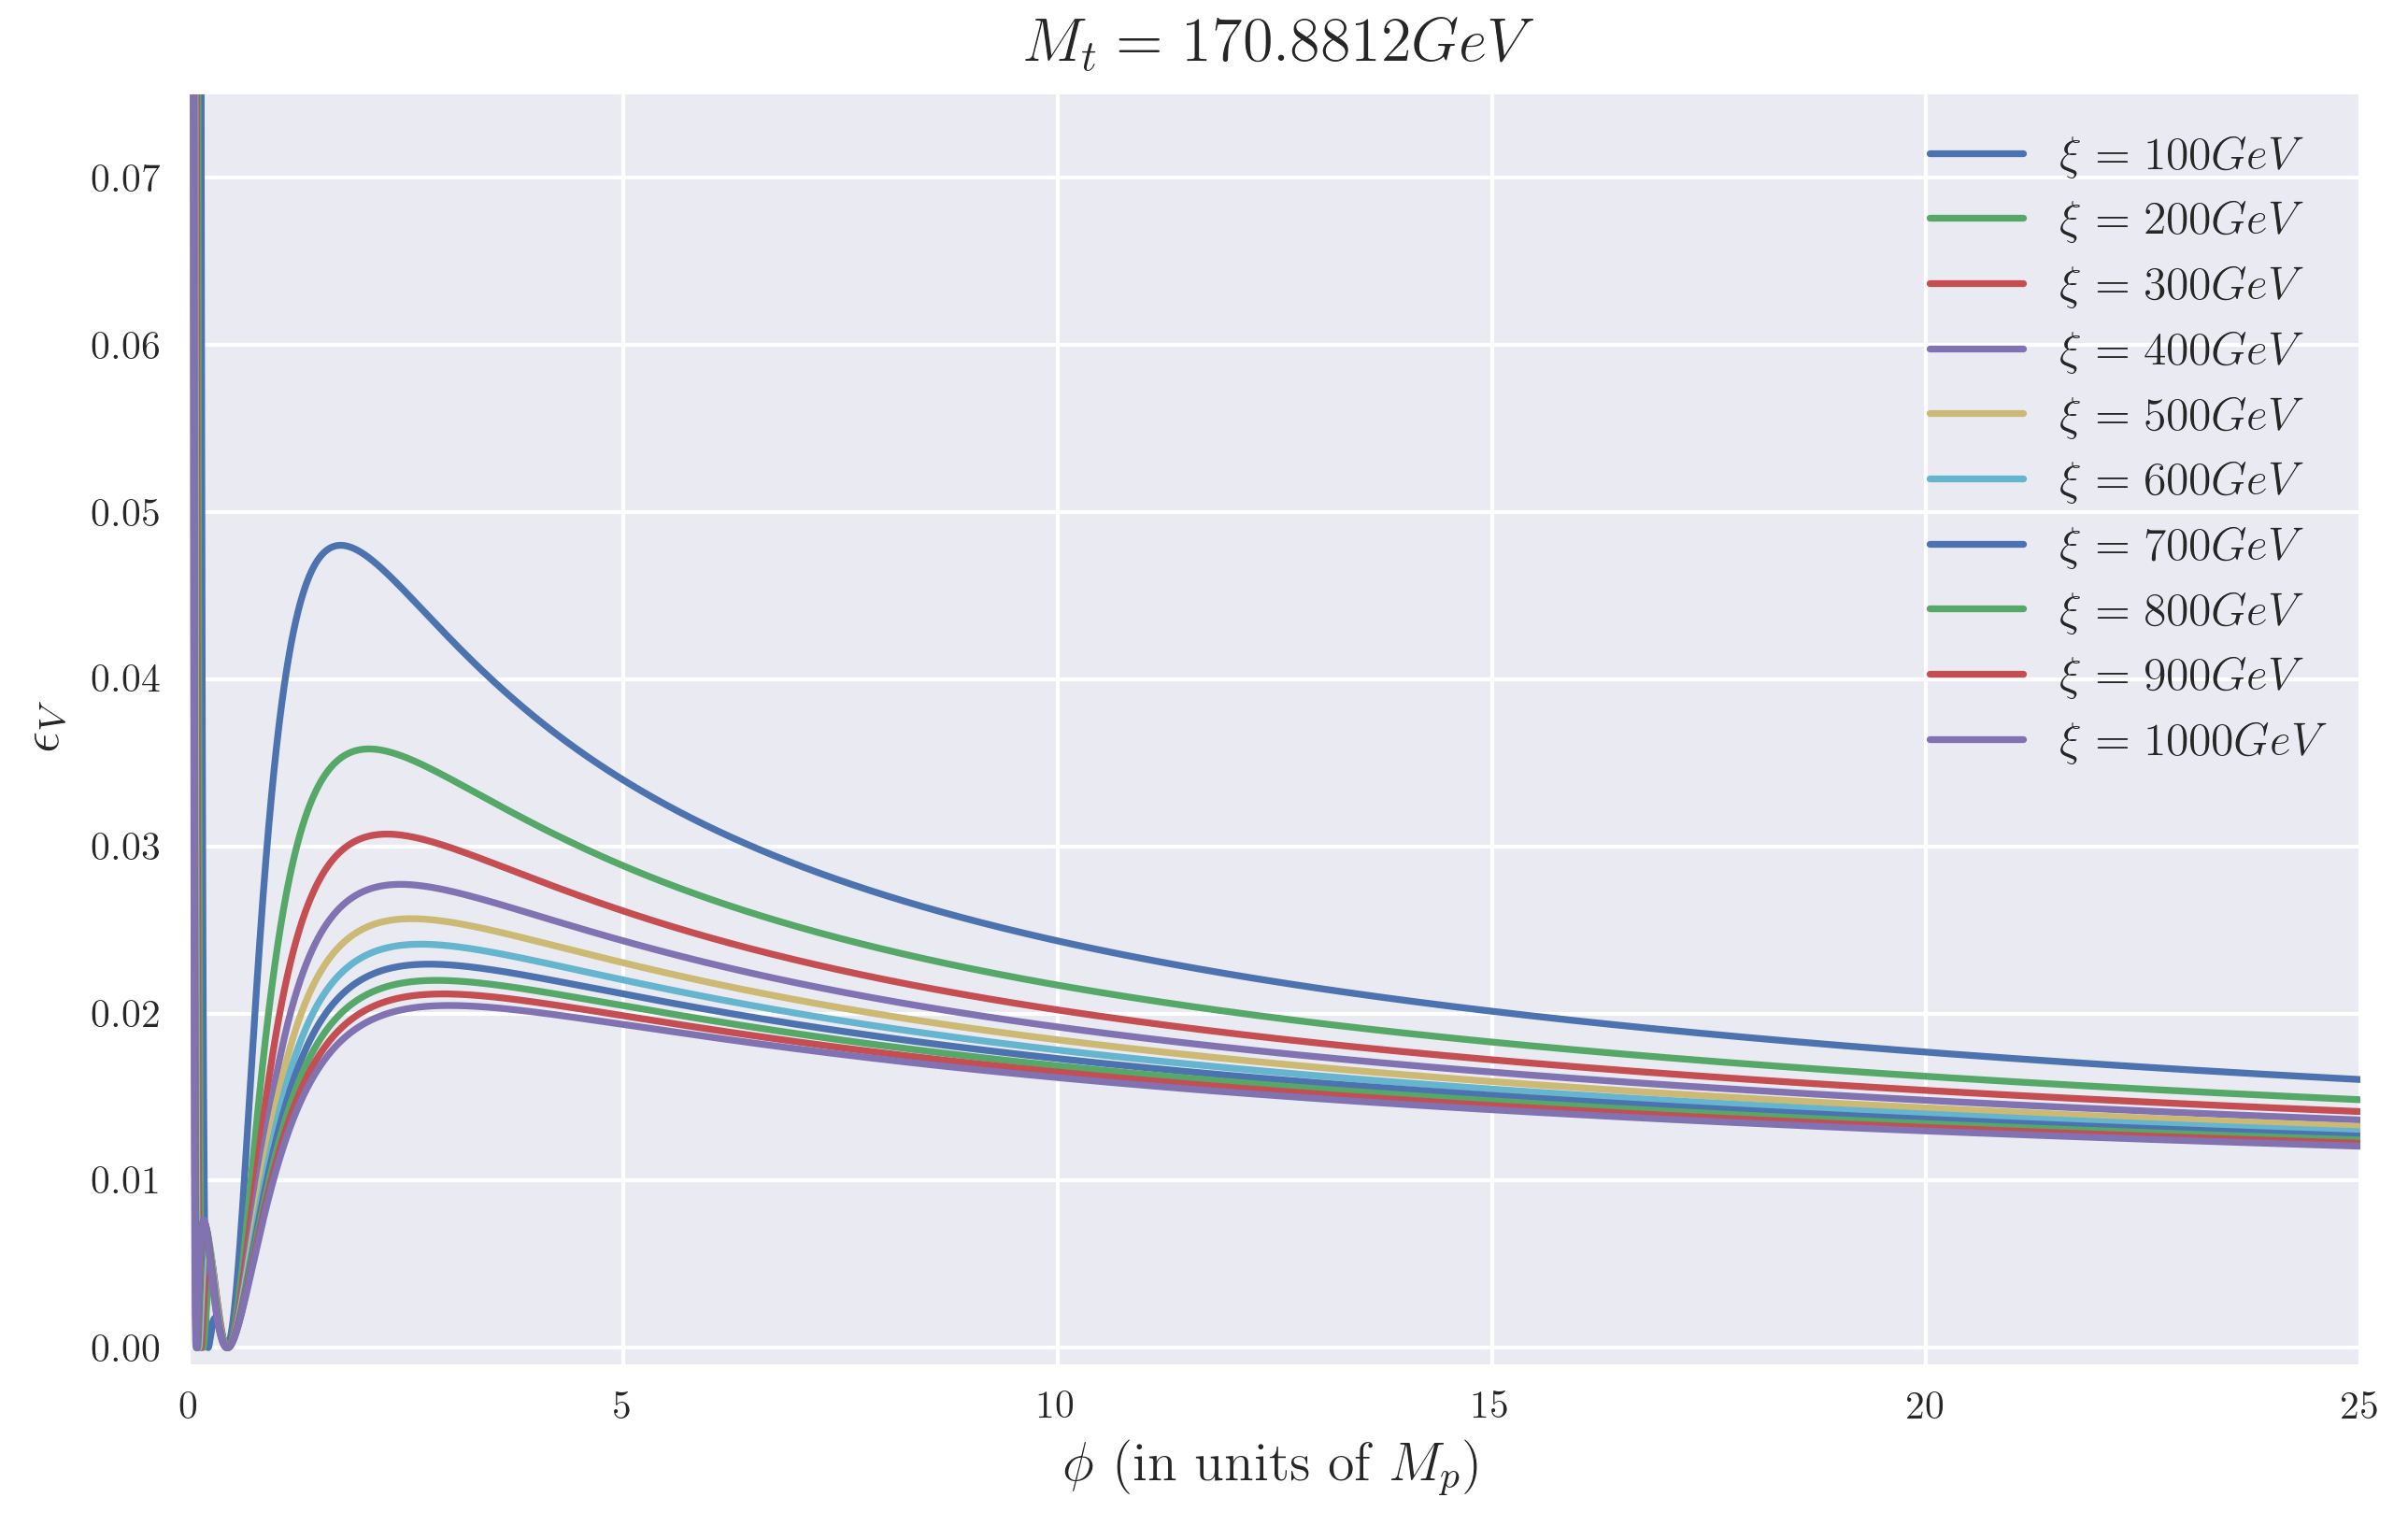

In [54]:
plt.figure(figsize=(10,6), dpi=300)
for xi in xi_keys[1:]:
    plt.plot(locals()['Rphi_'+str(mt)+'_'+str(xi)], locals()['E_'+str(mt)+'_'+str(xi)], label=r'$\xi='+str(xi)+'GeV$')
plt.title(r'$M_t='+str(mt)+'GeV$', fontsize=16)
plt.xlabel(r'$\phi$ (in units of $M_p$)', fontsize=14)
plt.ylabel(r'$\epsilon_V$', fontsize=14)
plt.legend(fontsize=12)
plt.axis([-0.01,25, -0.001, 0.075])
plt.show()

#### - Conclusion
> $\xi$ should be lower than $100$